   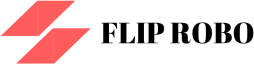

**Name: Vikas Kumar Mishra**

**Batch: Internship-32**

**Id:44**

# PROJECT: CAR PRICE PREDICTION

**With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.**

# 3.Model Building Phase

**After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.**

# Machine Learning Model Building

**Importing All the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the Data

In [2]:
df = pd.read_excel('Main_used_car_data.xlsx')
df.head()

,CAR_MODEL,CAR_AGE,CAR_KMS,TRANSMISSION,FUEL_TYPE,CAR_OWNERS,SEATING_CAPACITY,ENGINE_DISPLACEMENT(CC),MILEAGE(kmpl),CAR_MAX_PWR,TORQUE(NM),WHEEL_SIZE,CAR_PRICE(RS.)
0,Hyundai Venue SX Plus Turbo DCT BSIV,2019,32000,Automatic,Petrol,1,5,998,18.15,11835,171.6,16,1095000.0
1,Isuzu MUX 2WD,2017,139000,Automatic,Diesel,1,7,2999,13.80,17457,380.0,18,1750000.0
2,Honda Amaze S iVtech,2015,59534,Manual,Petrol,2,5,1198,18.00,867,109.0,15,440000.0
3,Hyundai EON D Lite,2013,13000,Manual,Petrol,1,5,814,21.10,552,74.5,15,310000.0
4,Maruti Swift VXI,2020,50000,Manual,Petrol,1,5,1197,21.21,8180,113.0,15,700000.0


In [3]:
df=pd.DataFrame(data=df)

In [4]:
df

,CAR_MODEL,CAR_AGE,CAR_KMS,TRANSMISSION,FUEL_TYPE,CAR_OWNERS,SEATING_CAPACITY,ENGINE_DISPLACEMENT(CC),MILEAGE(kmpl),CAR_MAX_PWR,TORQUE(NM),WHEEL_SIZE,CAR_PRICE(RS.)
0,Hyundai Venue SX Plus Turbo DCT BSIV,2019,32000,Automatic,Petrol,1,5,998,18.15,11835,171.6,16,1095000.0
1,Isuzu MUX 2WD,2017,139000,Automatic,Diesel,1,7,2999,13.80,17457,380.0,18,1750000.0
2,Honda Amaze S iVtech,2015,59534,Manual,Petrol,2,5,1198,18.00,867,109.0,15,440000.0
3,Hyundai EON D Lite,2013,13000,Manual,Petrol,1,5,814,21.10,552,74.5,15,310000.0
4,Maruti Swift VXI,2020,50000,Manual,Petrol,1,5,1197,21.21,8180,113.0,15,700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,Honda City i VTEC CVT VX,2017,19979,Manual,Diesel,1,5,1197,18.90,12136,90.0,15,430000.0
5096,Maruti Alto LXi BSIII,2015,111000,Manual,Petrol,1,5,1061,14.08,1475,138.0,15,450000.0
5097,Maruti Ertiga SHVS VDI,2015,55000,Manual,Petrol,1,5,1197,12.00,1944,17.0,15,335000.0
5098,Hyundai Xcent 1.2 VTVT SX Option,2020,41900,Automatic,Petrol,1,5,1086,15.56,838,24.0,16,975000.0


In [5]:
df.tail()

,CAR_MODEL,CAR_AGE,CAR_KMS,TRANSMISSION,FUEL_TYPE,CAR_OWNERS,SEATING_CAPACITY,ENGINE_DISPLACEMENT(CC),MILEAGE(kmpl),CAR_MAX_PWR,TORQUE(NM),WHEEL_SIZE,CAR_PRICE(RS.)
5095,Honda City i VTEC CVT VX,2017,19979,Manual,Diesel,1,5,1197,18.90,12136,90.0,15,430000.0
5096,Maruti Alto LXi BSIII,2015,111000,Manual,Petrol,1,5,1061,14.08,1475,138.0,15,450000.0
5097,Maruti Ertiga SHVS VDI,2015,55000,Manual,Petrol,1,5,1197,12.00,1944,17.0,15,335000.0
5098,Hyundai Xcent 1.2 VTVT SX Option,2020,41900,Automatic,Petrol,1,5,1086,15.56,838,24.0,16,975000.0
5099,Maruti Swift 1.3 LXI,2014,46000,Manual,Diesel,1,5,1798,21.21,132,90.0,17,235000.0


**Here we read the Excel file in jupyter notebook.**

# Data Inspection

In [6]:
df.shape

(5100, 13)

**There are 5100 rows and 13 columns in the dataset.**

In [7]:
df.dtypes

CAR_MODEL                   object
CAR_AGE                      int64
CAR_KMS                      int64
TRANSMISSION                object
FUEL_TYPE                   object
CAR_OWNERS                   int64
SEATING_CAPACITY             int64
ENGINE_DISPLACEMENT(CC)      int64
MILEAGE(kmpl)              float64
CAR_MAX_PWR                  int64
TORQUE(NM)                 float64
WHEEL_SIZE                   int64
CAR_PRICE(RS.)             float64
dtype: object

**Some columns have object data types, some have int, some have float and target column(CAR_PRICR(RS.)) have float data types**  

**Convert Column Data Types Int To Float**

In [8]:
df['ENGINE_DISPLACEMENT(CC)']=df['ENGINE_DISPLACEMENT(CC)'].astype(float)

In [9]:
df['CAR_MAX_PWR']=df['CAR_MAX_PWR'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CAR_MODEL                5100 non-null   object 
 1   CAR_AGE                  5100 non-null   int64  
 2   CAR_KMS                  5100 non-null   int64  
 3   TRANSMISSION             5100 non-null   object 
 4   FUEL_TYPE                5100 non-null   object 
 5   CAR_OWNERS               5100 non-null   int64  
 6   SEATING_CAPACITY         5100 non-null   int64  
 7   ENGINE_DISPLACEMENT(CC)  5100 non-null   float64
 8   MILEAGE(kmpl)            5100 non-null   float64
 9   CAR_MAX_PWR              5100 non-null   float64
 10  TORQUE(NM)               5080 non-null   float64
 11  WHEEL_SIZE               5100 non-null   int64  
 12  CAR_PRICE(RS.)           5100 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 518.1+ KB


**There are 13 columns and TORQUE(NM) column have null values.**

**The total memory usage of this dataset is 518.1 KB.**

In [11]:
df.columns

Index(['CAR_MODEL', 'CAR_AGE', 'CAR_KMS', 'TRANSMISSION', 'FUEL_TYPE',
       'CAR_OWNERS', 'SEATING_CAPACITY', 'ENGINE_DISPLACEMENT(CC)',
       'MILEAGE(kmpl)', 'CAR_MAX_PWR', 'TORQUE(NM)', 'WHEEL_SIZE',
       'CAR_PRICE(RS.)'],
      dtype='object')

**There are 13 columns:**


**'CAR_MODEL' : It gives us the brand of the car alongwith its model name and manufacturing year.**


**'CAR_AGE' : It gives us Manufacture Year Of all cars.**


**'CAR_KMS' : It gives us the total distance in kms covered by car.**


**'TRANSMISSION' : It tells us whether the gear transmission is Manual or Automatic.**


**'FUEL_TYPE' : It gives us the type of fuel used by the car.**


**'CAR_OWNERS' : It tells us the total numbers of owners car had previously.**


**'SEATING_CAPACITY' : It tell us how many seats are there in the cars.**


**'ENGINE_DISPLACEMENT(CC)' : It tell us size of engine and capability of engine cubic capacity(CC).**


**'MILEAGE(kmpl)' : It give us car running mileage in kilometers/hour.**


**'CAR_MAX_PWR' : It give us maximum power of cars.**

   
**'TORQUE(NM)' : It give us rotational force of cars.**
   
   
**'WHEEL_SIZE' : It tell us size of tyre.**
   
   
**'CAR_PRICE(RS.)' : It gives us the price of the car.**


  **Here 'CAR_PRICE(RS.)' is our target variable.**



# Data Cleaning

In [12]:
#Checking for Null values
df.isnull().sum()

CAR_MODEL                   0
CAR_AGE                     0
CAR_KMS                     0
TRANSMISSION                0
FUEL_TYPE                   0
CAR_OWNERS                  0
SEATING_CAPACITY            0
ENGINE_DISPLACEMENT(CC)     0
MILEAGE(kmpl)               0
CAR_MAX_PWR                 0
TORQUE(NM)                 20
WHEEL_SIZE                  0
CAR_PRICE(RS.)              0
dtype: int64

**There are 20 null values in column 'TORQUE(NM)', we will use Mode to fill the rows with null value.**

<AxesSubplot:>

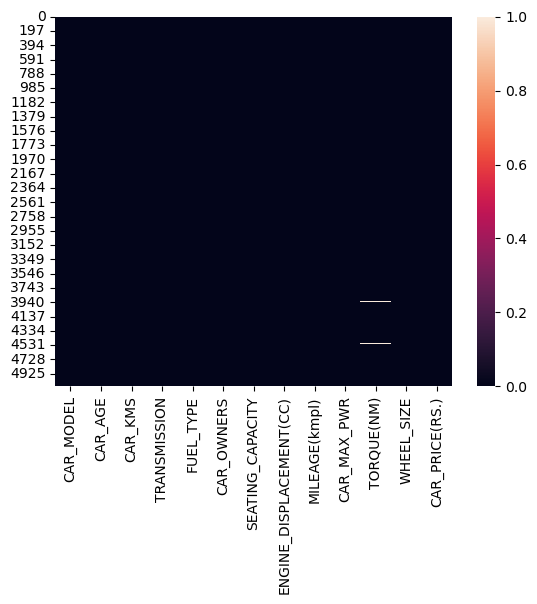

In [13]:
sns.heatmap(df.isnull())

**This is the visualization of having just a small number null values in the dataset.**

In [14]:
print('Mean of Torque:',df['TORQUE(NM)'].mean())
print('Median of Torque:',df['TORQUE(NM)'].median())

Mean of Torque: 182.47558267716553
Median of Torque: 145.0


In [15]:
df['TORQUE(NM)'] = df['TORQUE(NM)'].fillna(df['TORQUE(NM)'].median())

In [16]:
df['TORQUE(NM)'].isnull().sum()

0

In [17]:
df.duplicated().sum()

0

from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='mean')
df['SEATING_CAPACITY']=imp.fit_transform(df['SEATING_CAPACITY'].values.reshape(-1,1))

**Treating the null values with strategy='meadian' using fillna Method**

In [18]:
#Checking for Null values
df.isnull().sum()

CAR_MODEL                  0
CAR_AGE                    0
CAR_KMS                    0
TRANSMISSION               0
FUEL_TYPE                  0
CAR_OWNERS                 0
SEATING_CAPACITY           0
ENGINE_DISPLACEMENT(CC)    0
MILEAGE(kmpl)              0
CAR_MAX_PWR                0
TORQUE(NM)                 0
WHEEL_SIZE                 0
CAR_PRICE(RS.)             0
dtype: int64

**Now there are no null values in the dataset.**

# Exploratory Data Analysis

**Scatter Plot:**

In [19]:
df.columns

Index(['CAR_MODEL', 'CAR_AGE', 'CAR_KMS', 'TRANSMISSION', 'FUEL_TYPE',
       'CAR_OWNERS', 'SEATING_CAPACITY', 'ENGINE_DISPLACEMENT(CC)',
       'MILEAGE(kmpl)', 'CAR_MAX_PWR', 'TORQUE(NM)', 'WHEEL_SIZE',
       'CAR_PRICE(RS.)'],
      dtype='object')

<AxesSubplot:xlabel='CAR_AGE', ylabel='CAR_PRICE(RS.)'>

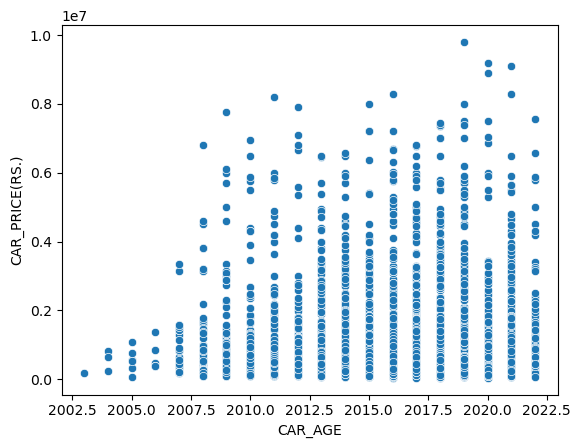

In [20]:
sns.scatterplot(x='CAR_AGE', y='CAR_PRICE(RS.)', data=df)

We Can See The High Car Price is Between Year 2019-2021

<AxesSubplot:xlabel='CAR_KMS', ylabel='CAR_PRICE(RS.)'>

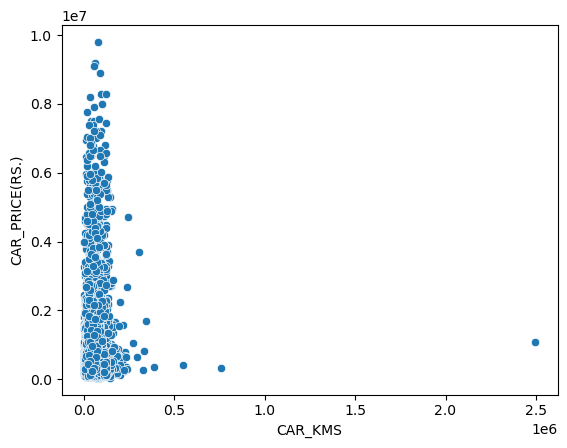

In [21]:
sns.scatterplot(x='CAR_KMS', y='CAR_PRICE(RS.)', data=df)

We Can See The Car KMs range between 0 to 3

<AxesSubplot:xlabel='TRANSMISSION', ylabel='CAR_PRICE(RS.)'>

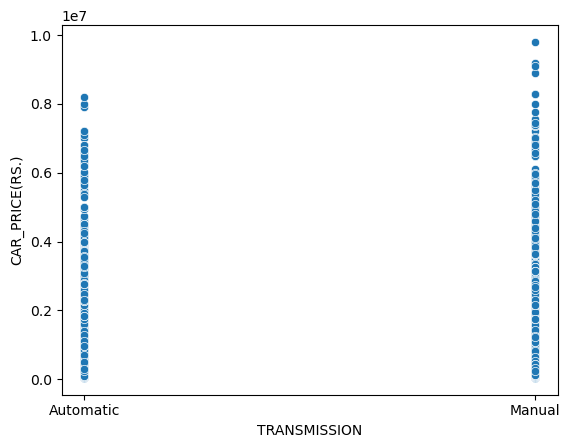

In [22]:
sns.scatterplot(x='TRANSMISSION', y='CAR_PRICE(RS.)', data=df)

We Can Manual Transmission Of Car Is high.

<AxesSubplot:xlabel='FUEL_TYPE', ylabel='CAR_PRICE(RS.)'>

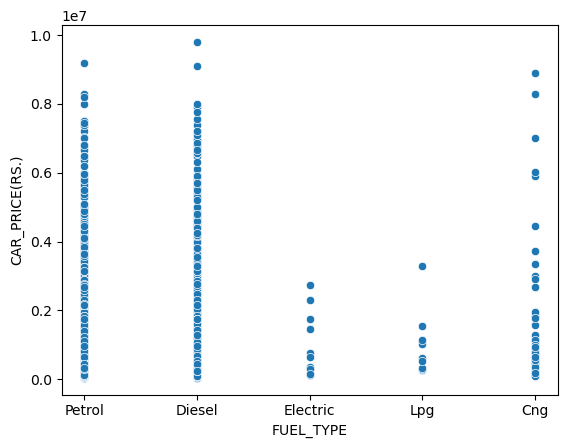

In [23]:
sns.scatterplot(x='FUEL_TYPE', y='CAR_PRICE(RS.)', data=df)

We Can See Diesel is High in range than other fuel type.

<AxesSubplot:xlabel='CAR_OWNERS', ylabel='CAR_PRICE(RS.)'>

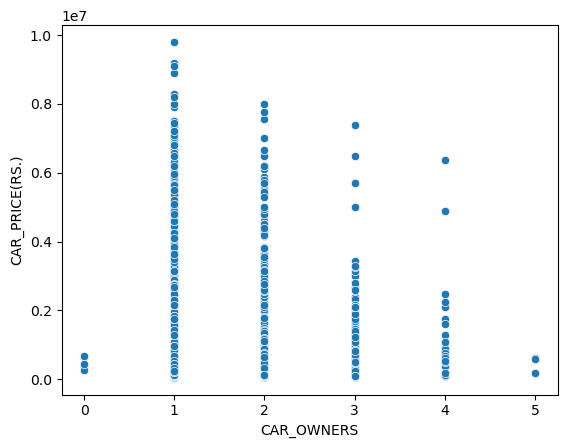

In [24]:
sns.scatterplot(x='CAR_OWNERS', y='CAR_PRICE(RS.)', data=df)

We can See the 1st owner car is in high price range.

<AxesSubplot:xlabel='SEATING_CAPACITY', ylabel='CAR_PRICE(RS.)'>

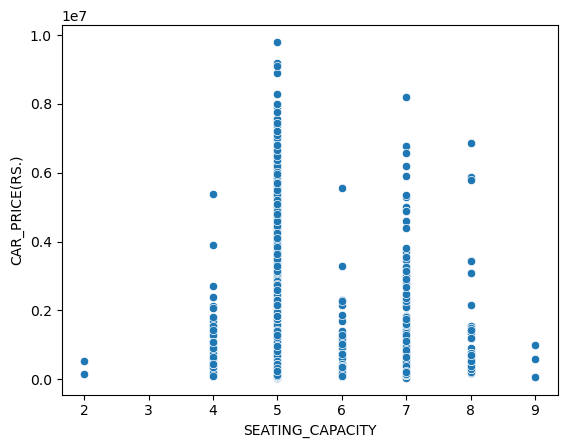

In [25]:
sns.scatterplot(x='SEATING_CAPACITY', y='CAR_PRICE(RS.)', data=df)

We can see the 5 seating capacity of car in high range.

<AxesSubplot:xlabel='ENGINE_DISPLACEMENT(CC)', ylabel='CAR_PRICE(RS.)'>

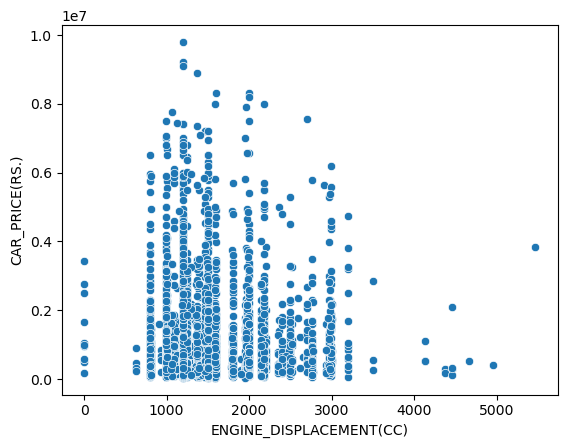

In [26]:
sns.scatterplot(x='ENGINE_DISPLACEMENT(CC)', y='CAR_PRICE(RS.)', data=df)

We can see the engine displacement high range between 1000cc to 2000cc

<AxesSubplot:xlabel='MILEAGE(kmpl)', ylabel='CAR_PRICE(RS.)'>

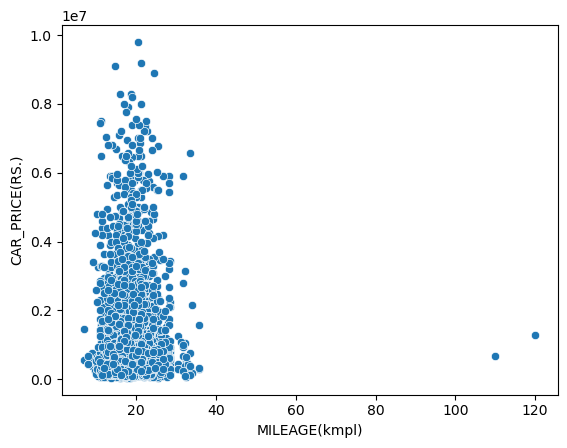

In [27]:
sns.scatterplot(x='MILEAGE(kmpl)', y='CAR_PRICE(RS.)', data=df)

We can see car mileage range between 18 kmpl to 21 kmpl is high price.

<AxesSubplot:xlabel='CAR_MAX_PWR', ylabel='CAR_PRICE(RS.)'>

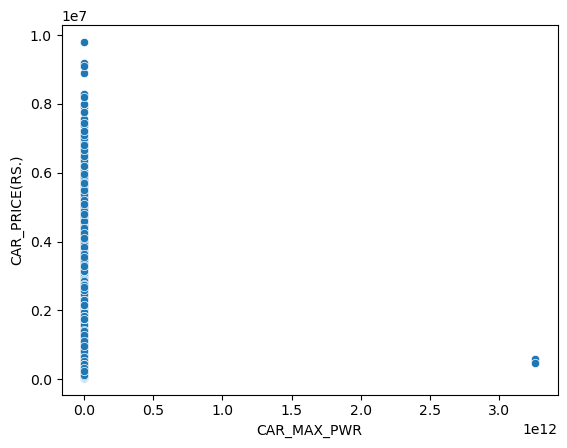

In [28]:
sns.scatterplot(x='CAR_MAX_PWR', y='CAR_PRICE(RS.)', data=df)

<AxesSubplot:xlabel='TORQUE(NM)', ylabel='CAR_PRICE(RS.)'>

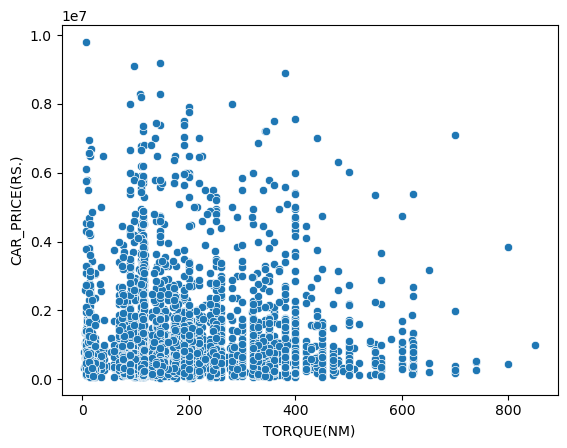

In [29]:
sns.scatterplot(x='TORQUE(NM)', y='CAR_PRICE(RS.)', data=df)

We can see the range of Torque(NM) is 0 to 400 is high

<AxesSubplot:xlabel='WHEEL_SIZE', ylabel='CAR_PRICE(RS.)'>

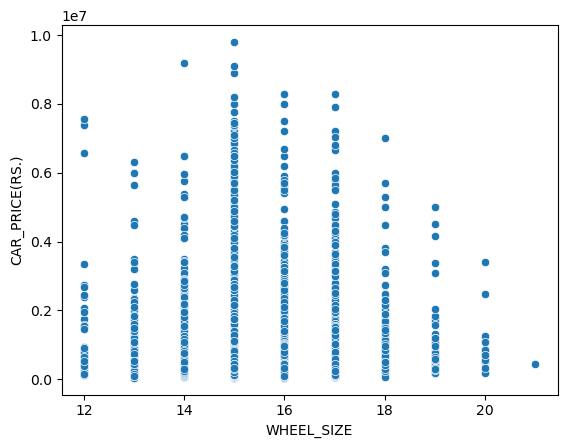

In [30]:
sns.scatterplot(x='WHEEL_SIZE', y='CAR_PRICE(RS.)', data=df)

We see wheel size 15 is high demand and high price

<AxesSubplot:xlabel='CAR_PRICE(RS.)'>

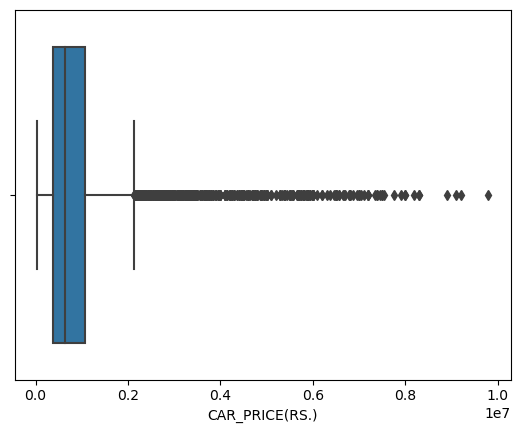

In [31]:
sns.boxplot(df['CAR_PRICE(RS.)'])

**There are many outliers but since it's the target variable, hence we will not treat the outliers.**

<AxesSubplot:xlabel='CAR_PRICE(RS.)', ylabel='Density'>

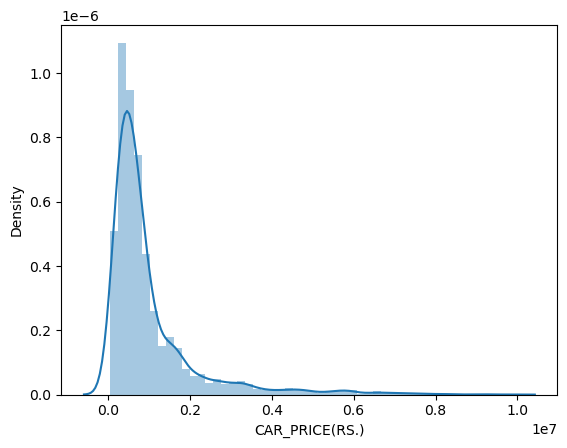

In [32]:
sns.distplot(df['CAR_PRICE(RS.)'])

**The data is very tightly distributed here and is almost normalized.**

In [33]:
#sort Columns by their datatype

df.columns.to_series().groupby(df.dtypes).groups

{int64: ['CAR_AGE', 'CAR_KMS', 'CAR_OWNERS', 'SEATING_CAPACITY', 'WHEEL_SIZE'], float64: ['ENGINE_DISPLACEMENT(CC)', 'MILEAGE(kmpl)', 'CAR_MAX_PWR', 'TORQUE(NM)', 'CAR_PRICE(RS.)'], object: ['CAR_MODEL', 'TRANSMISSION', 'FUEL_TYPE']}

In [34]:
Numeric_Data=['CAR_AGE', 'CAR_KMS', 'CAR_OWNERS', 'ENGINE_DISPLACEMENT(CC)', 'SEATING_CAPACITY', 'WHEEL_SIZE', 'MILEAGE(kmpl)', 'CAR_MAX_PWR', 'TORQUE(NM)']

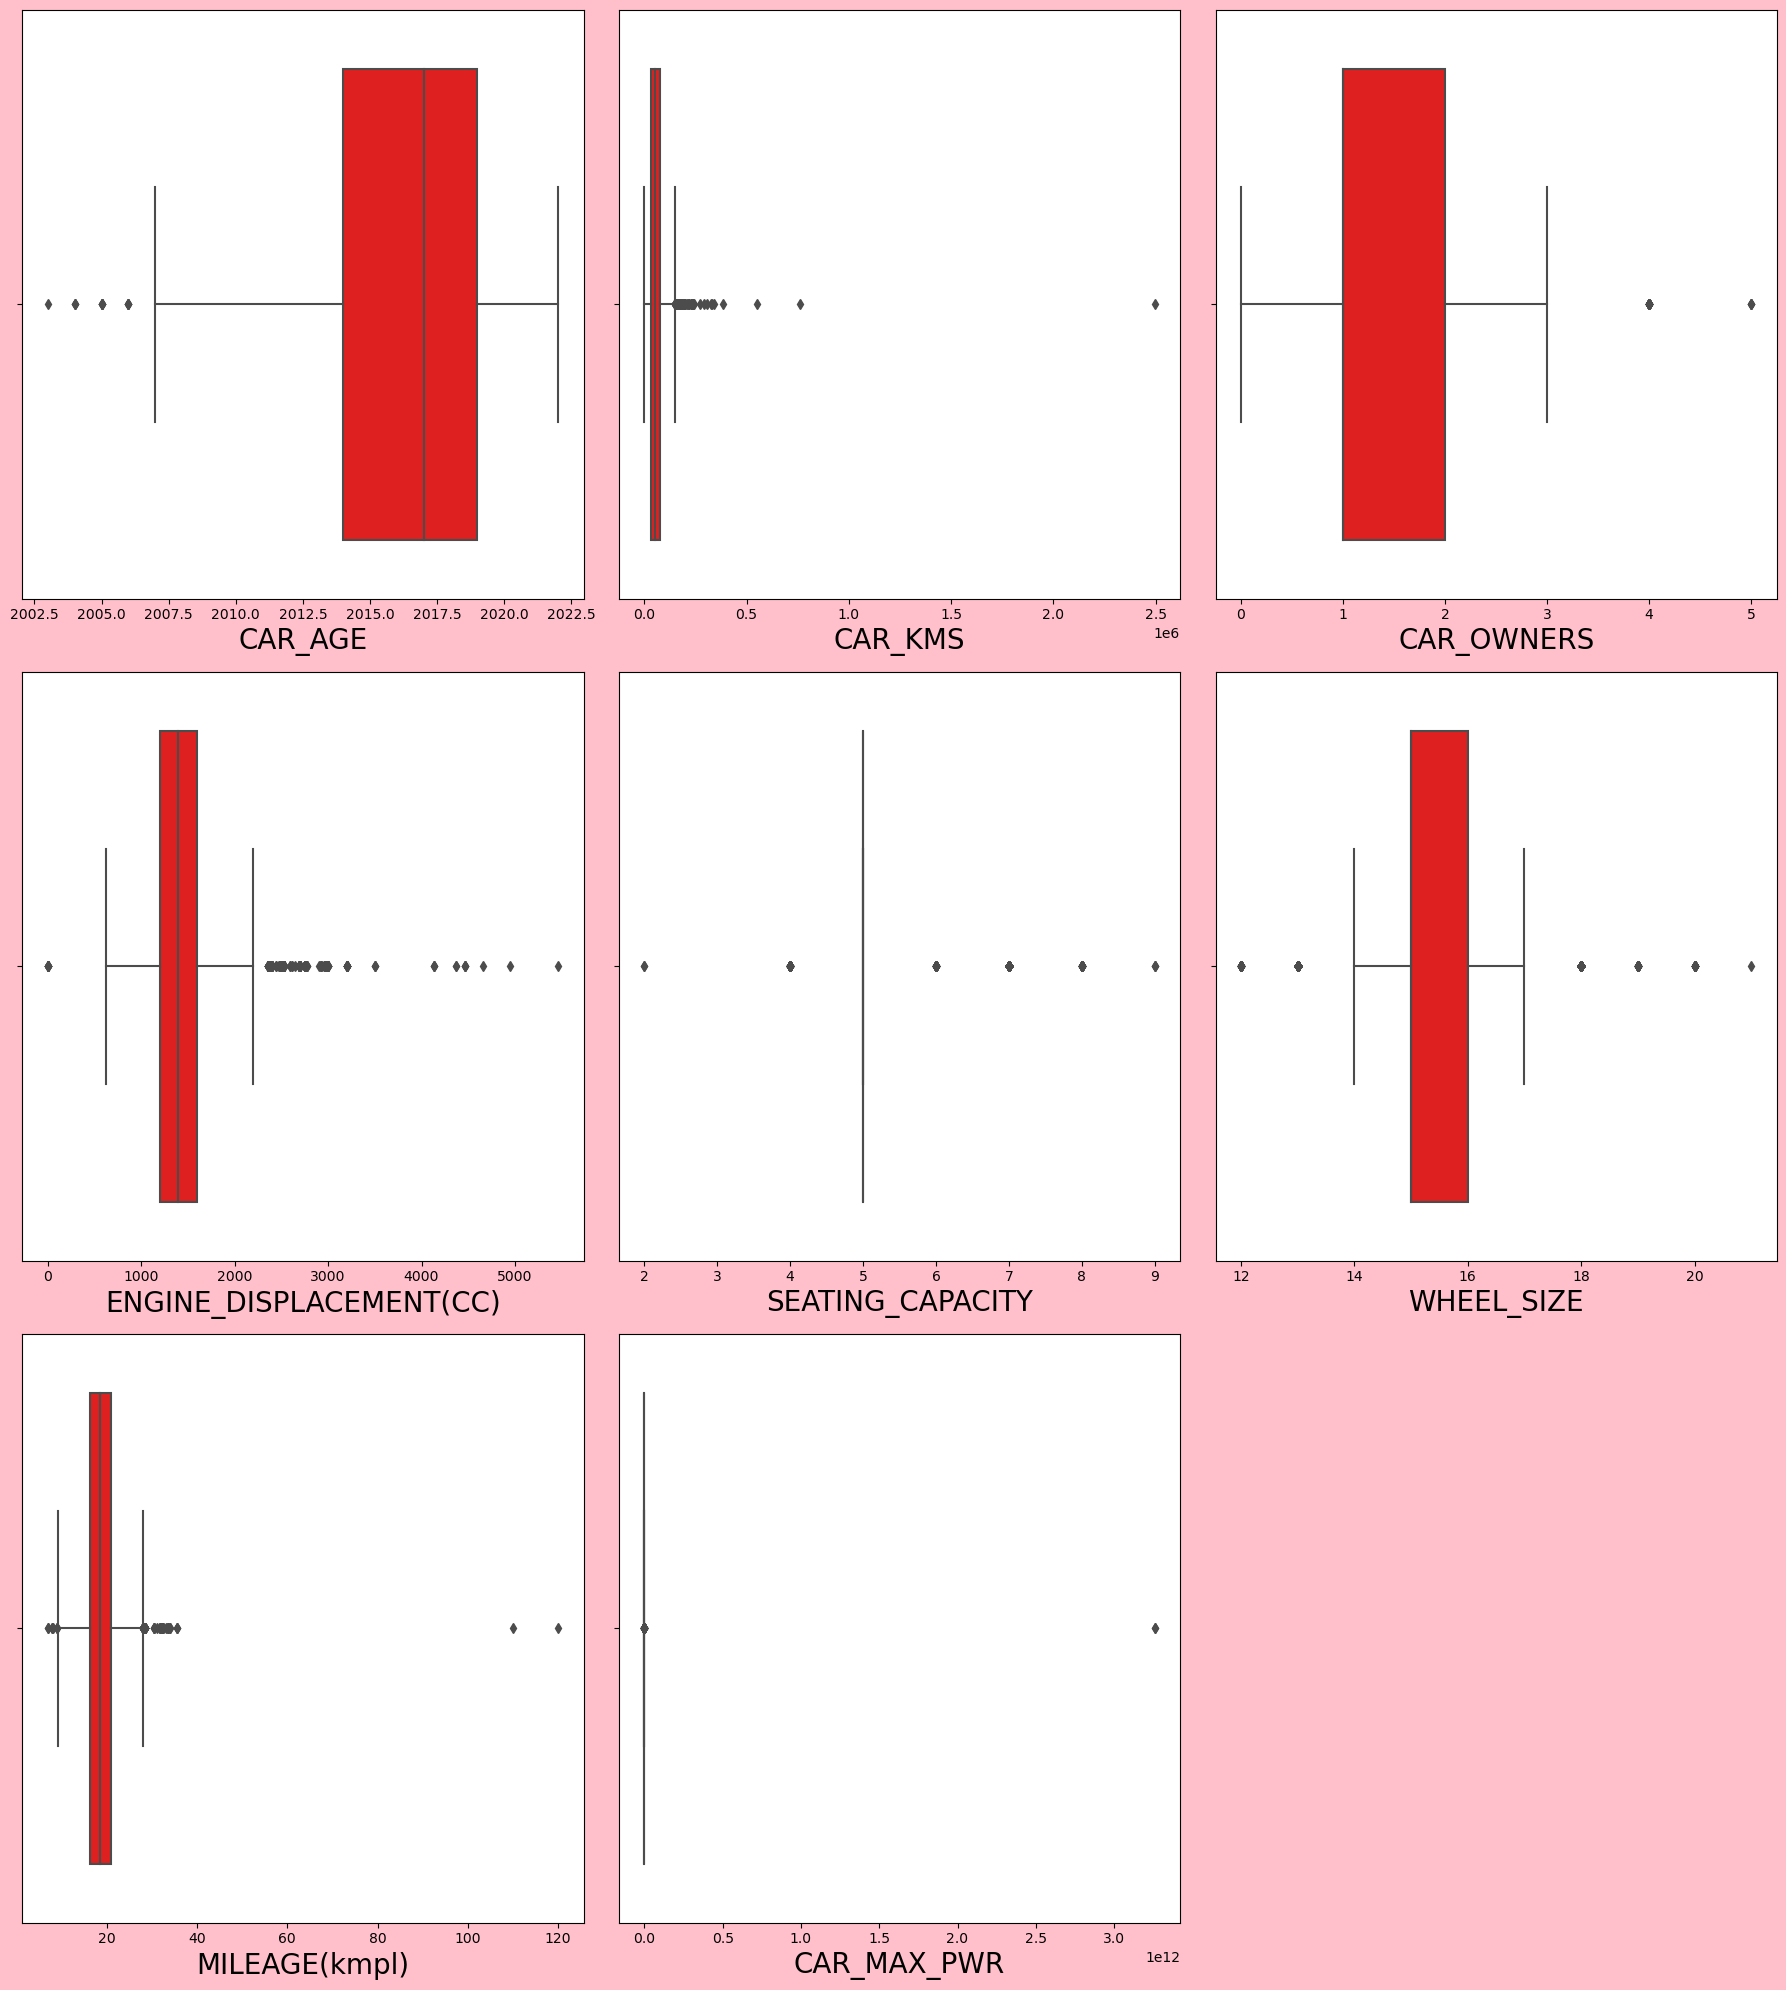

In [35]:
plt.figure(figsize=(18,20),facecolor='pink')
pl_no=1
for i in Numeric_Data:
    if pl_no<=8:
        ax=plt.subplot(3, 3, pl_no)
        sns.boxplot(df[i],color='red')
        plt.xlabel(i,fontsize=20)
    pl_no+=1
plt.tight_layout()

We can see lots of data contain outliers in upper bound.

In [37]:
df.corr()

,CAR_AGE,CAR_KMS,CAR_OWNERS,SEATING_CAPACITY,ENGINE_DISPLACEMENT(CC),MILEAGE(kmpl),CAR_MAX_PWR,TORQUE(NM),WHEEL_SIZE,CAR_PRICE(RS.)
CAR_AGE,1.000000,0.034789,0.009569,-0.031753,0.005210,-0.000422,0.008231,-0.006209,-0.014883,0.015661
CAR_KMS,0.034789,1.000000,0.026275,-0.004532,0.030543,-0.009696,-0.012016,-0.006085,0.027034,0.015327
CAR_OWNERS,0.009569,0.026275,1.000000,-0.014662,0.002383,0.004033,0.005263,0.003866,-0.004393,-0.014076
SEATING_CAPACITY,-0.031753,-0.004532,-0.014662,1.000000,-0.014797,0.006170,-0.005808,0.018522,0.014456,-0.003683
ENGINE_DISPLACEMENT(CC),0.005210,0.030543,0.002383,-0.014797,1.000000,-0.007282,-0.027576,0.027784,0.014301,0.005514
MILEAGE(kmpl),-0.000422,-0.009696,0.004033,0.006170,-0.007282,1.000000,-0.016577,-0.010930,0.013151,0.003541
CAR_MAX_PWR,0.008231,-0.012016,0.005263,-0.005808,-0.027576,-0.016577,1.000000,-0.019537,0.001804,-0.008214
TORQUE(NM),-0.006209,-0.006085,0.003866,0.018522,0.027784,-0.010930,-0.019537,1.000000,0.029455,0.009845
WHEEL_SIZE,-0.014883,0.027034,-0.004393,0.014456,0.014301,0.013151,0.001804,0.029455,1.000000,-0.006917
CAR_PRICE(RS.),0.015661,0.015327,-0.014076,-0.003683,0.005514,0.003541,-0.008214,0.009845,-0.006917,1.000000


<AxesSubplot:>

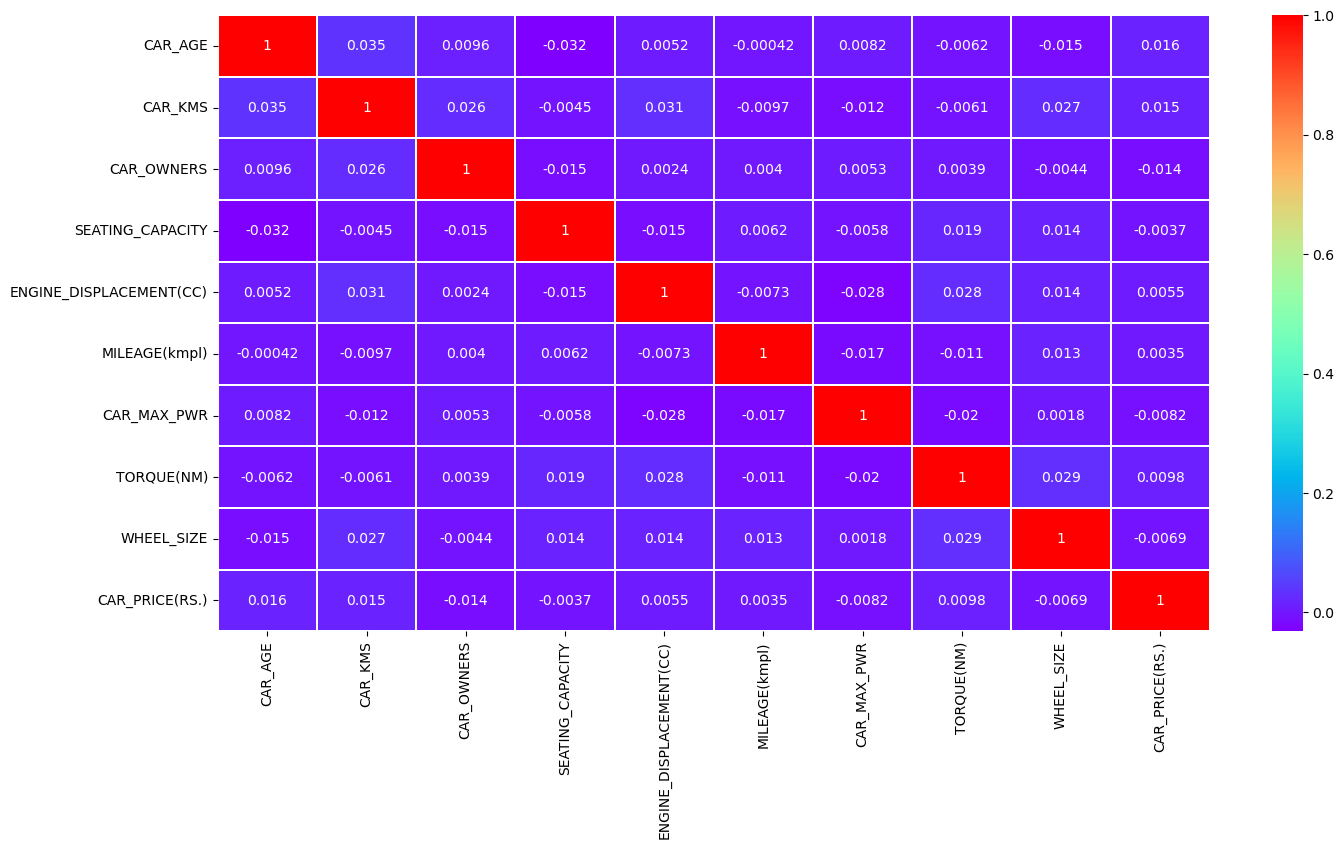

In [45]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), linewidth=0.1, cmap="rainbow", annot = True)

In [38]:
df.corr()['CAR_PRICE(RS.)'].sort_values()

CAR_OWNERS                -0.014076
CAR_MAX_PWR               -0.008214
WHEEL_SIZE                -0.006917
SEATING_CAPACITY          -0.003683
MILEAGE(kmpl)              0.003541
ENGINE_DISPLACEMENT(CC)    0.005514
TORQUE(NM)                 0.009845
CAR_KMS                    0.015327
CAR_AGE                    0.015661
CAR_PRICE(RS.)             1.000000
Name: CAR_PRICE(RS.), dtype: float64

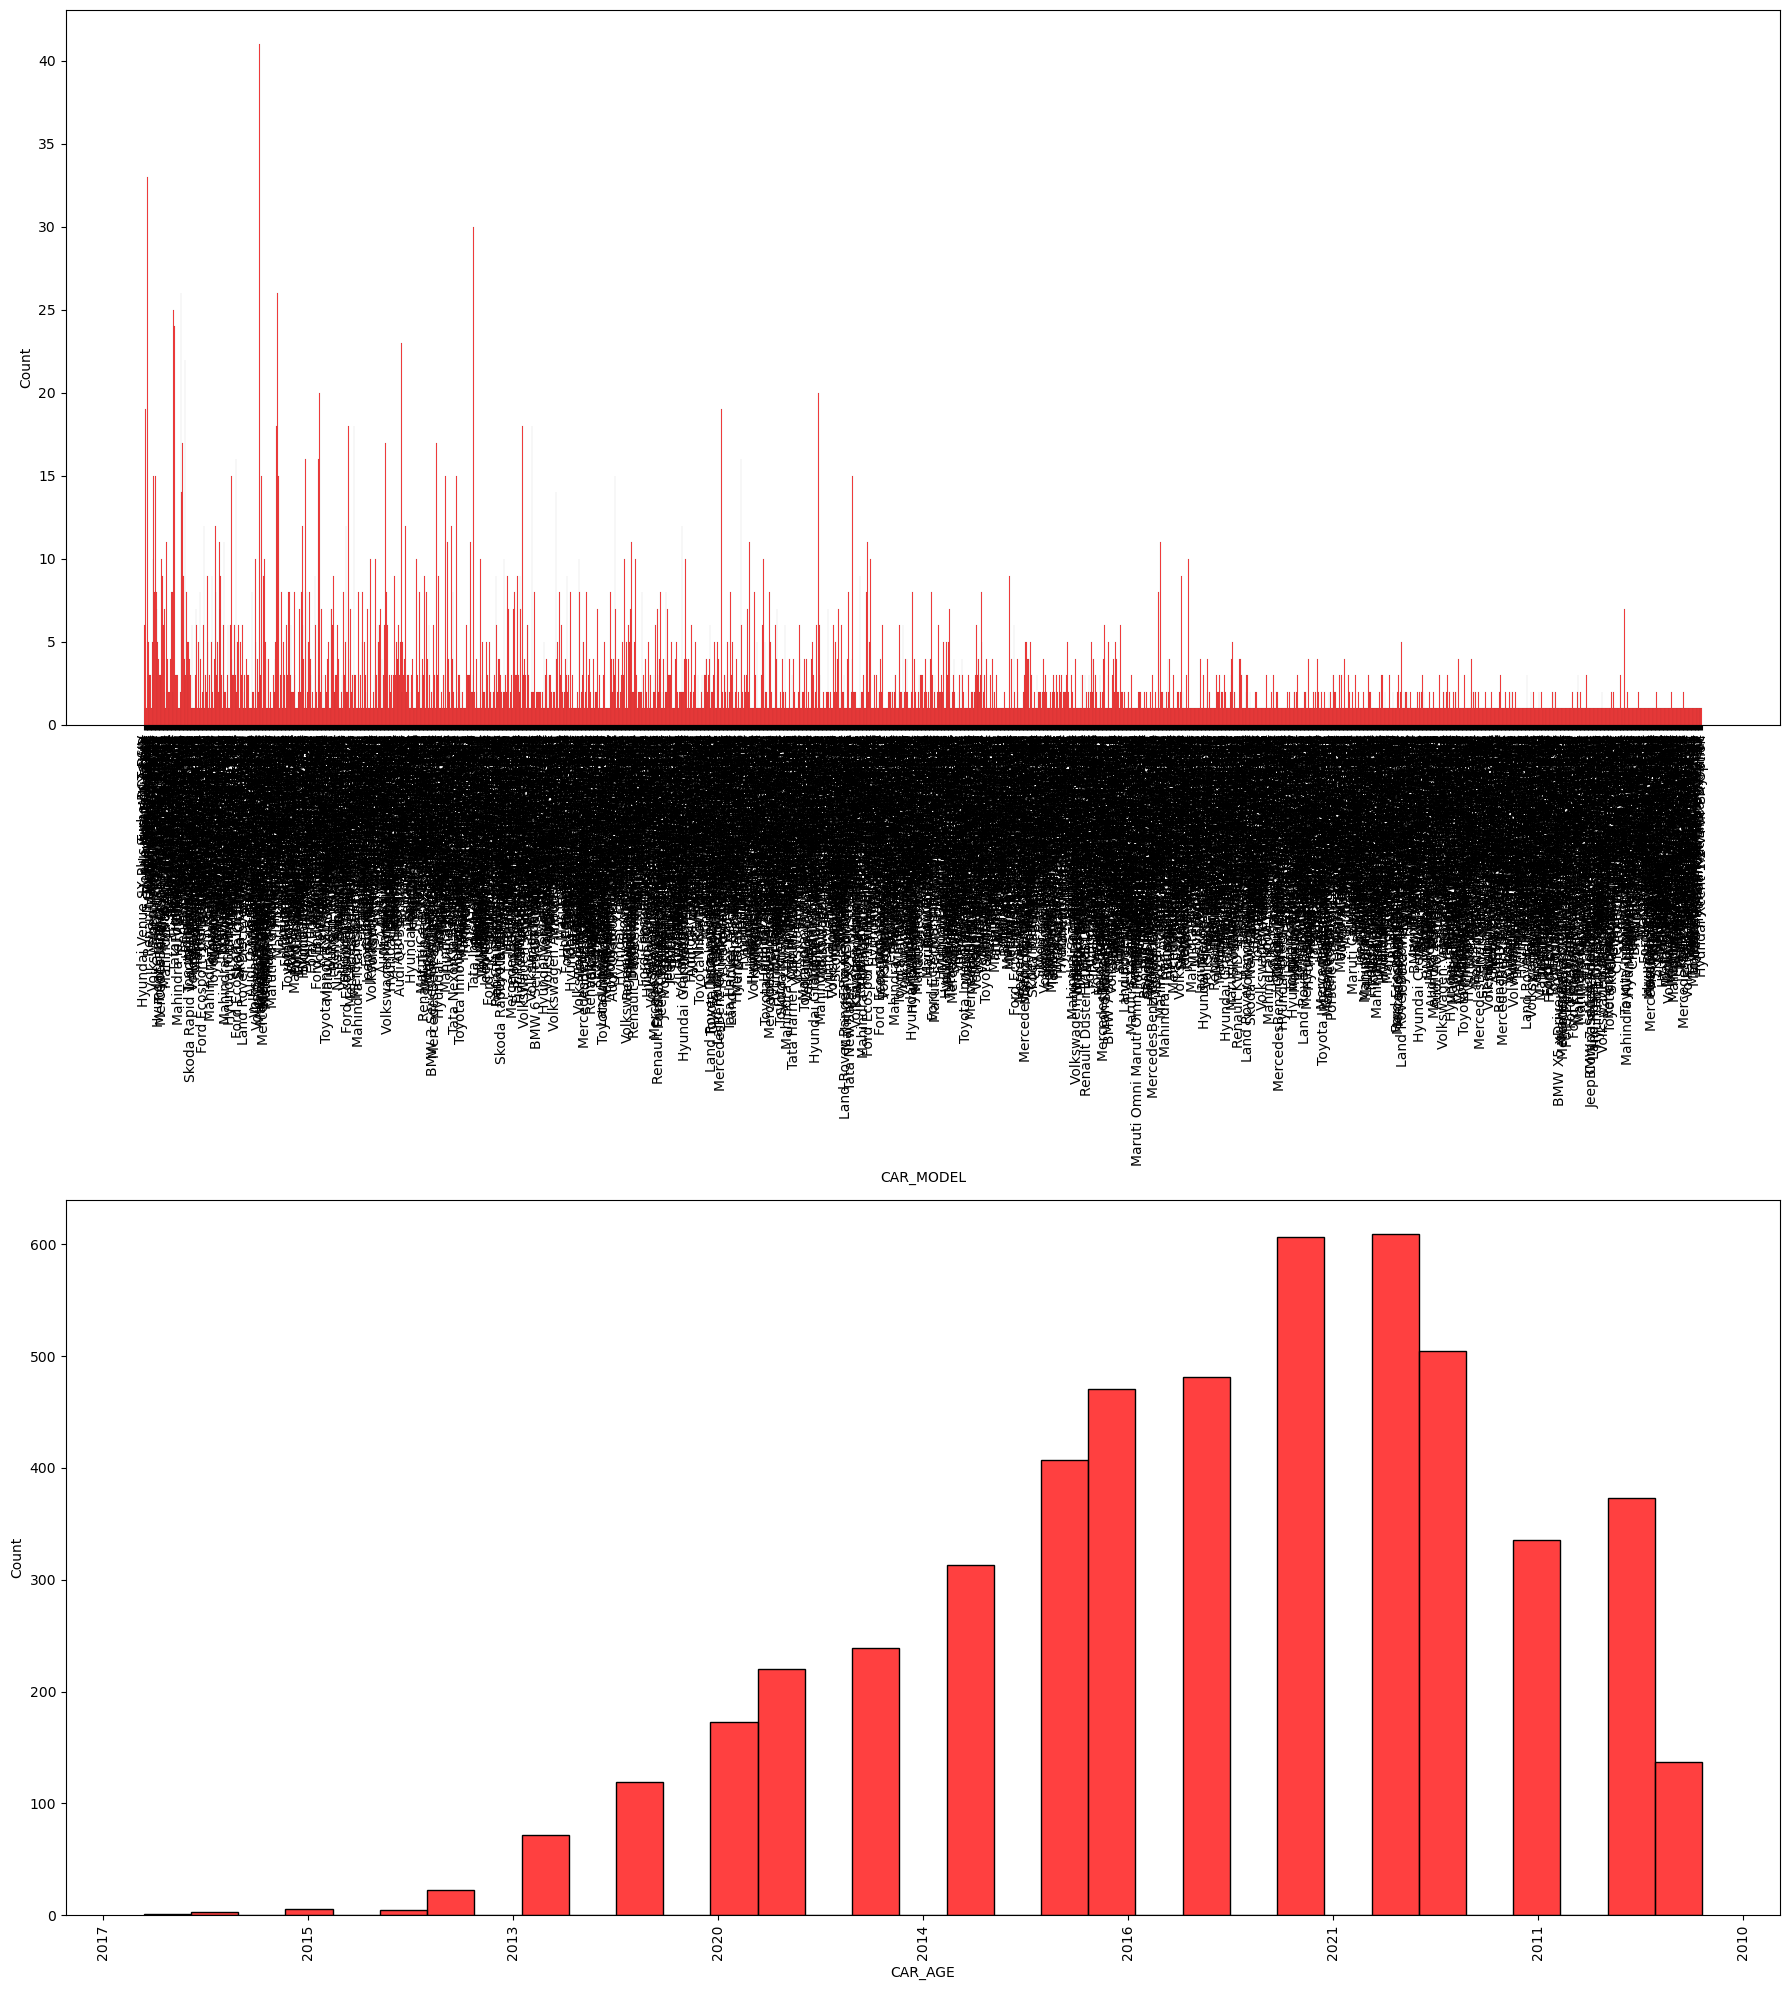

In [46]:
collist=df.columns[0:2].values
plt.figure(figsize=(18,20))
for i in range(0,len(collist)):
    plt.subplot(2,1,i+1)
    sns.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)
    plt.tight_layout()

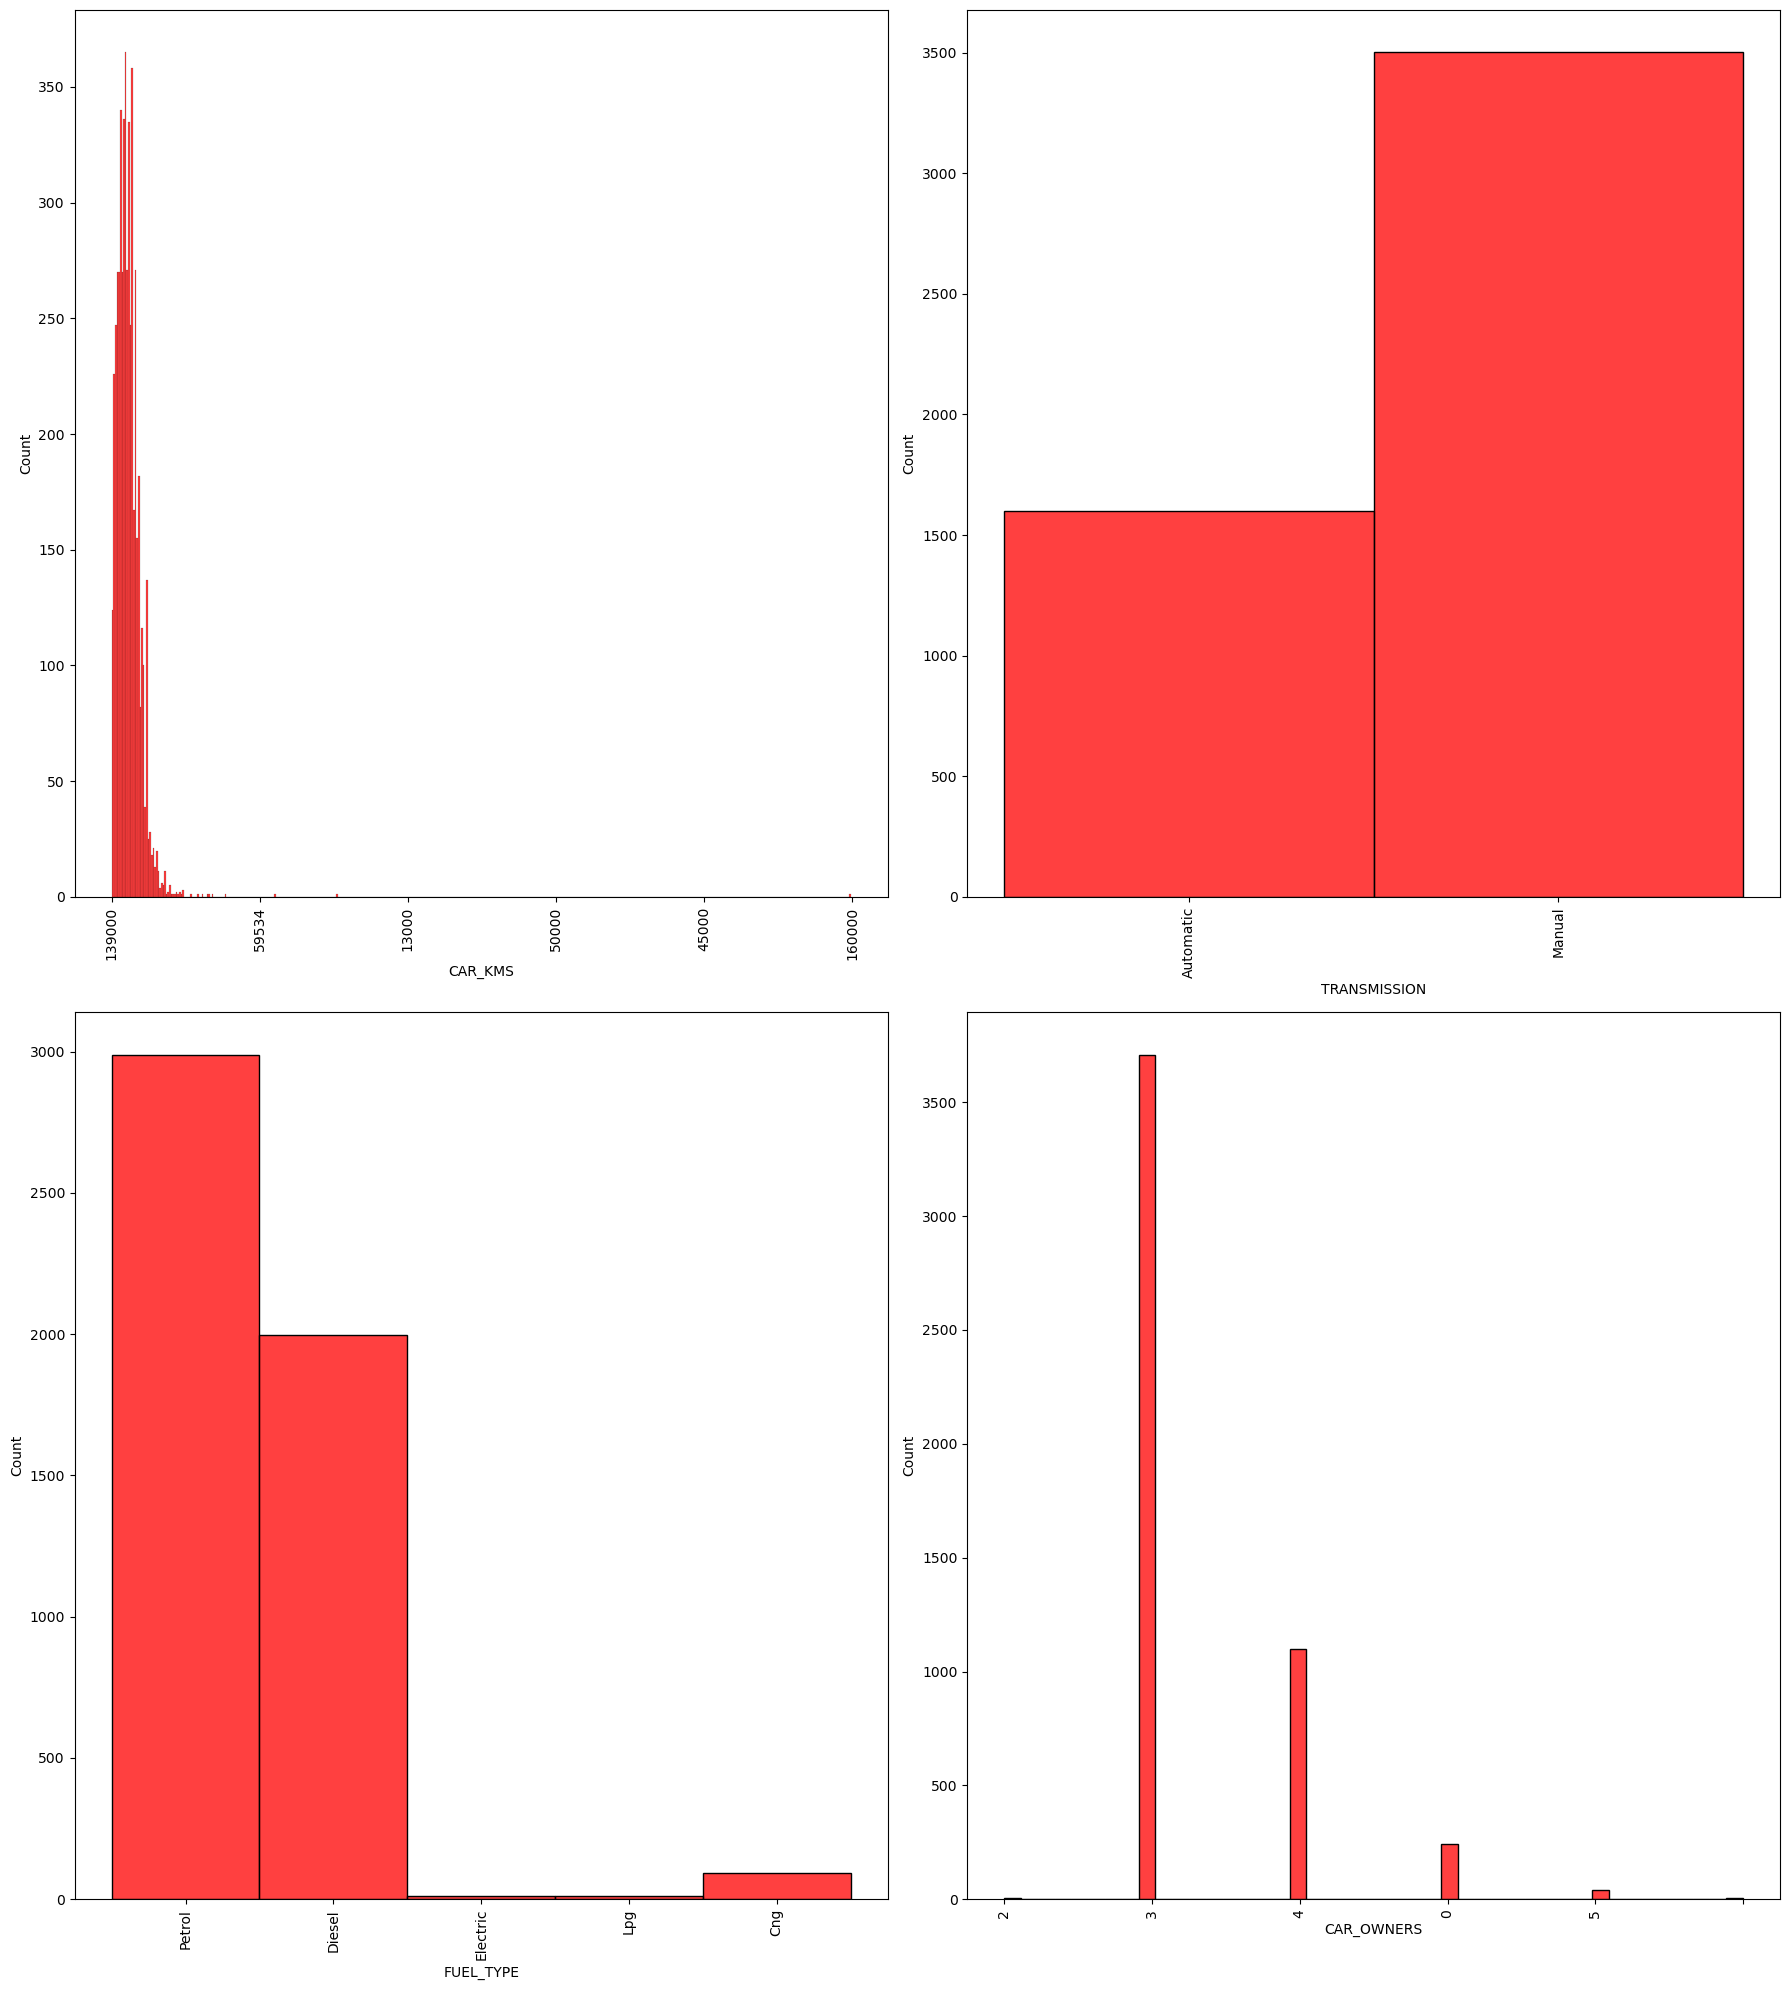

In [47]:
collist=df.columns[2:6].values
plt.figure(figsize=(18,20))
for i in range(0,len(collist)):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)
    plt.tight_layout()

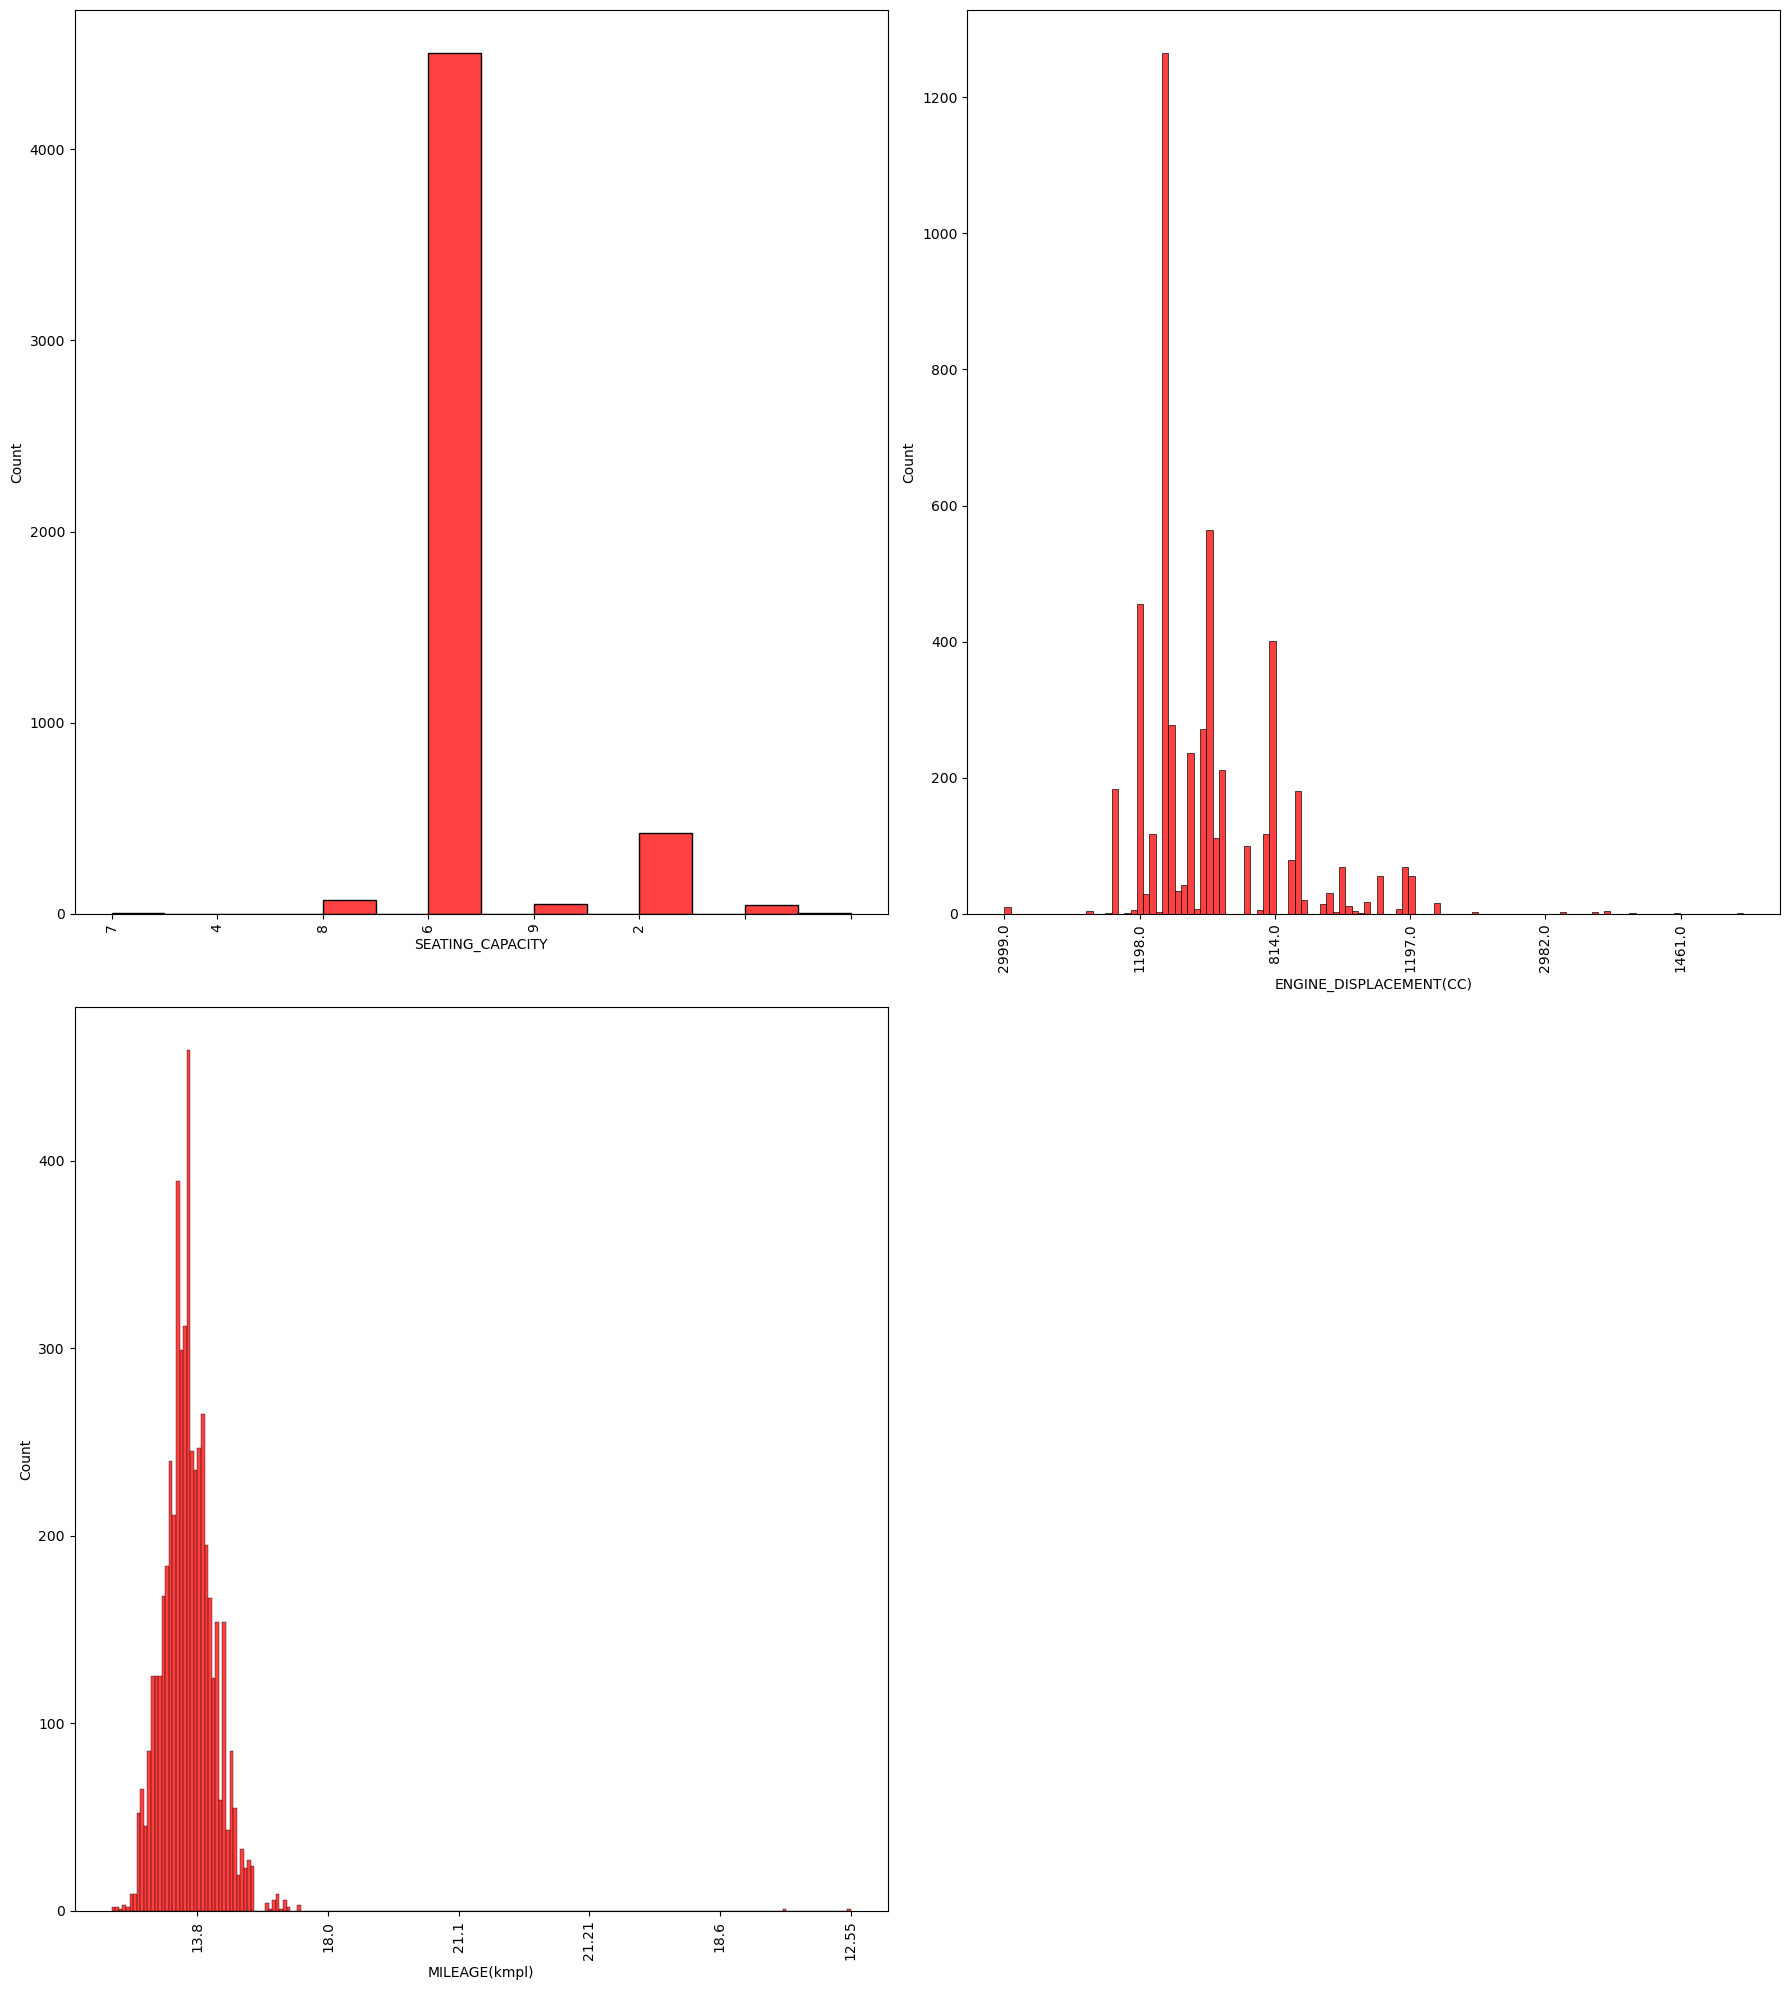

In [49]:
collist=df.columns[6:9].values
plt.figure(figsize=(18,20))
for i in range(0,len(collist)):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)
    plt.tight_layout()

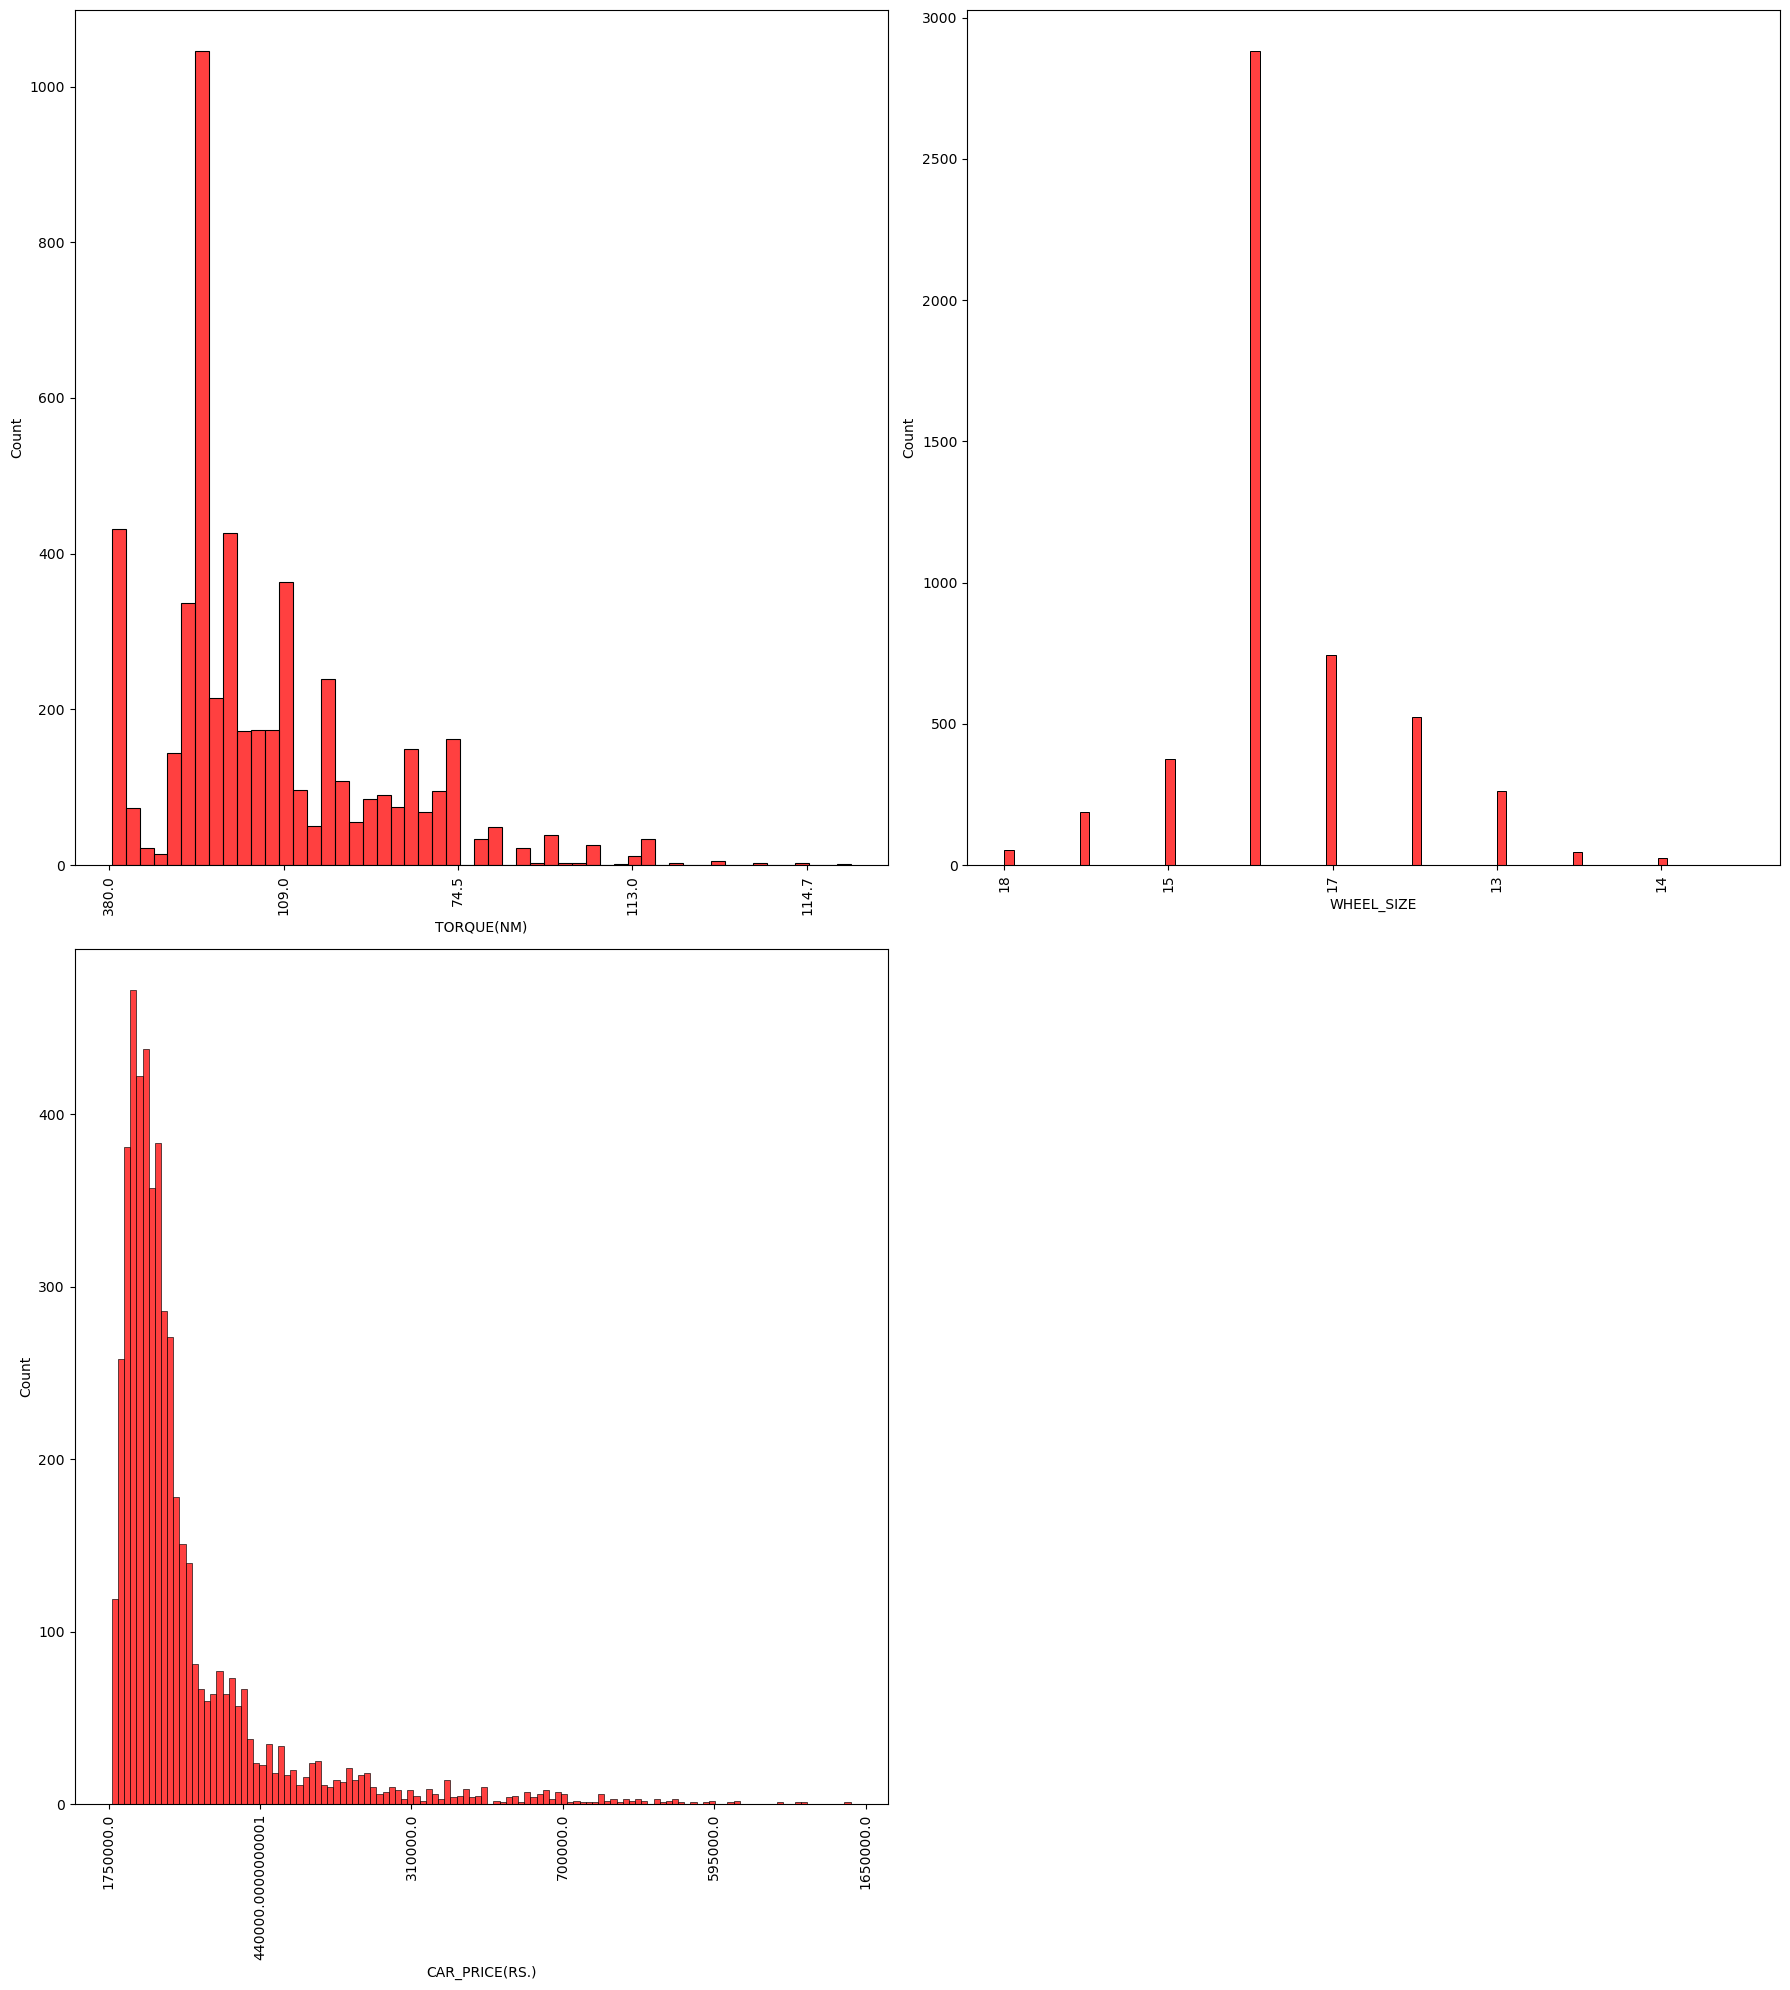

In [50]:
collist=df.columns[10:13].values
plt.figure(figsize=(18,20))
for i in range(0,len(collist)):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)
    plt.tight_layout()

 Brands and Driven Kilometers have a wide range of values in them.

 Maximum Cars run on either Petrol or diesel. Only few goes for CNG and other fuels.

 Maximum Cars have Manual transnission.

 Maximum cars are being sold by their very 3rd Owner.

 Almost all the cars have a price rnging in between 1750000 to 1200000 approx.

In [51]:
df.columns

Index(['CAR_MODEL', 'CAR_AGE', 'CAR_KMS', 'TRANSMISSION', 'FUEL_TYPE',
       'CAR_OWNERS', 'SEATING_CAPACITY', 'ENGINE_DISPLACEMENT(CC)',
       'MILEAGE(kmpl)', 'CAR_MAX_PWR', 'TORQUE(NM)', 'WHEEL_SIZE',
       'CAR_PRICE(RS.)'],
      dtype='object')

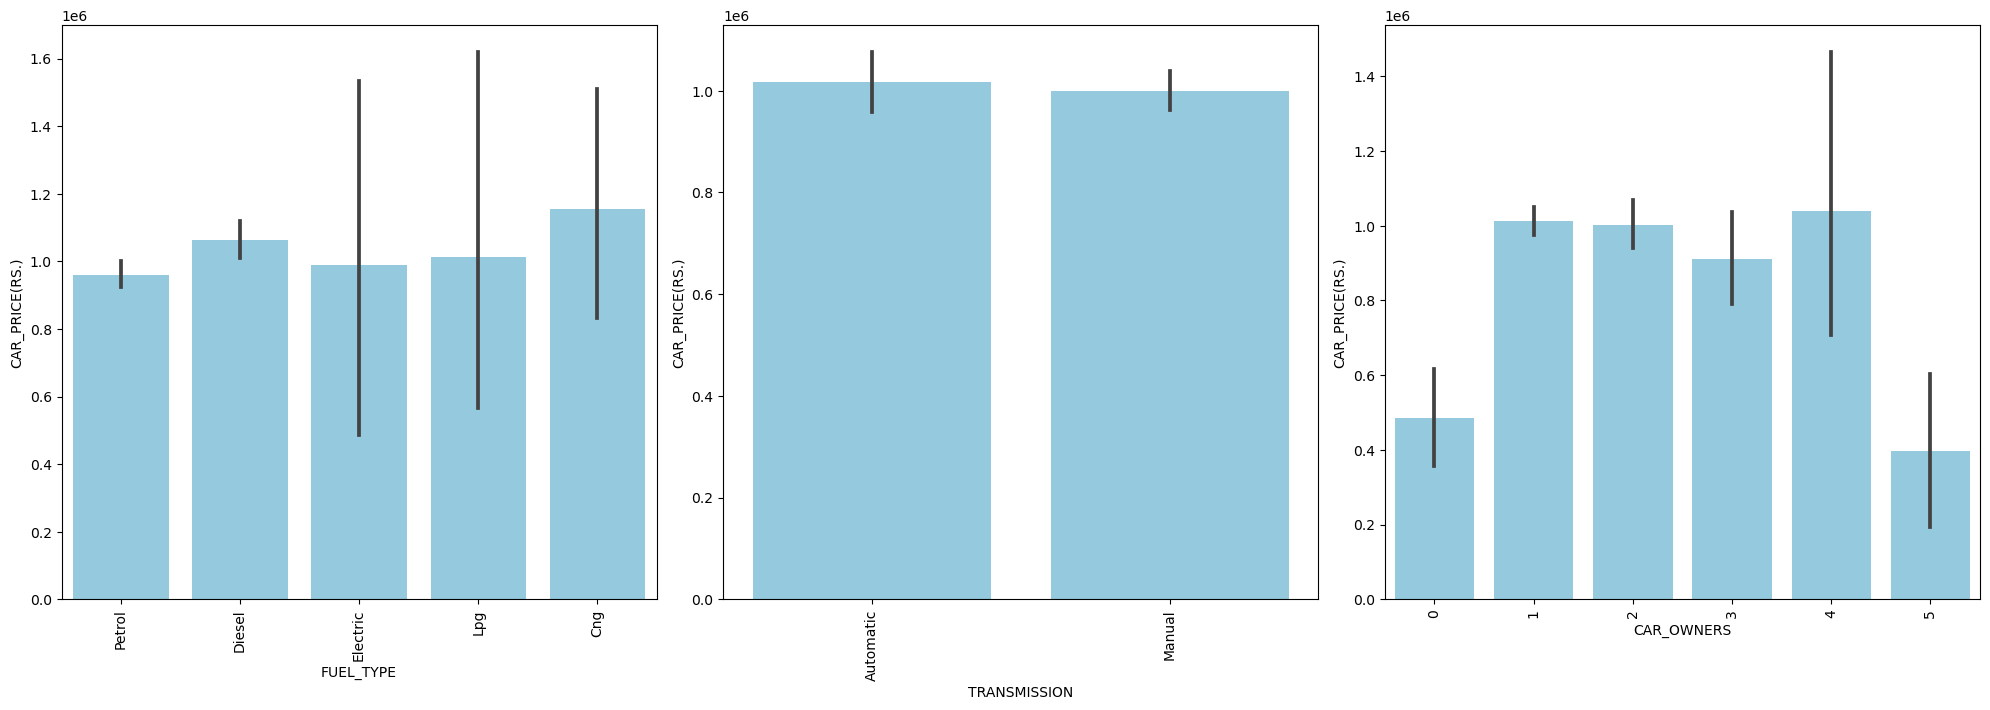

In [52]:
newcollist=['FUEL_TYPE','TRANSMISSION','CAR_OWNERS']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(data=df,x=i[1],y='CAR_PRICE(RS.)',color='skyblue')
    plt.xticks(rotation=90)
    plt.tight_layout()

Since Brands and Driven Kilometers have a wide range of values in them, we will not perform bivariate analysis for them as they will not give us any specific details. Now by plotting graph of Fuel type, Transmission and Owner against Price, we conclude that Car that uses CNG, have automatic Transmission and Has only 4th owner is more likely to have a high price.

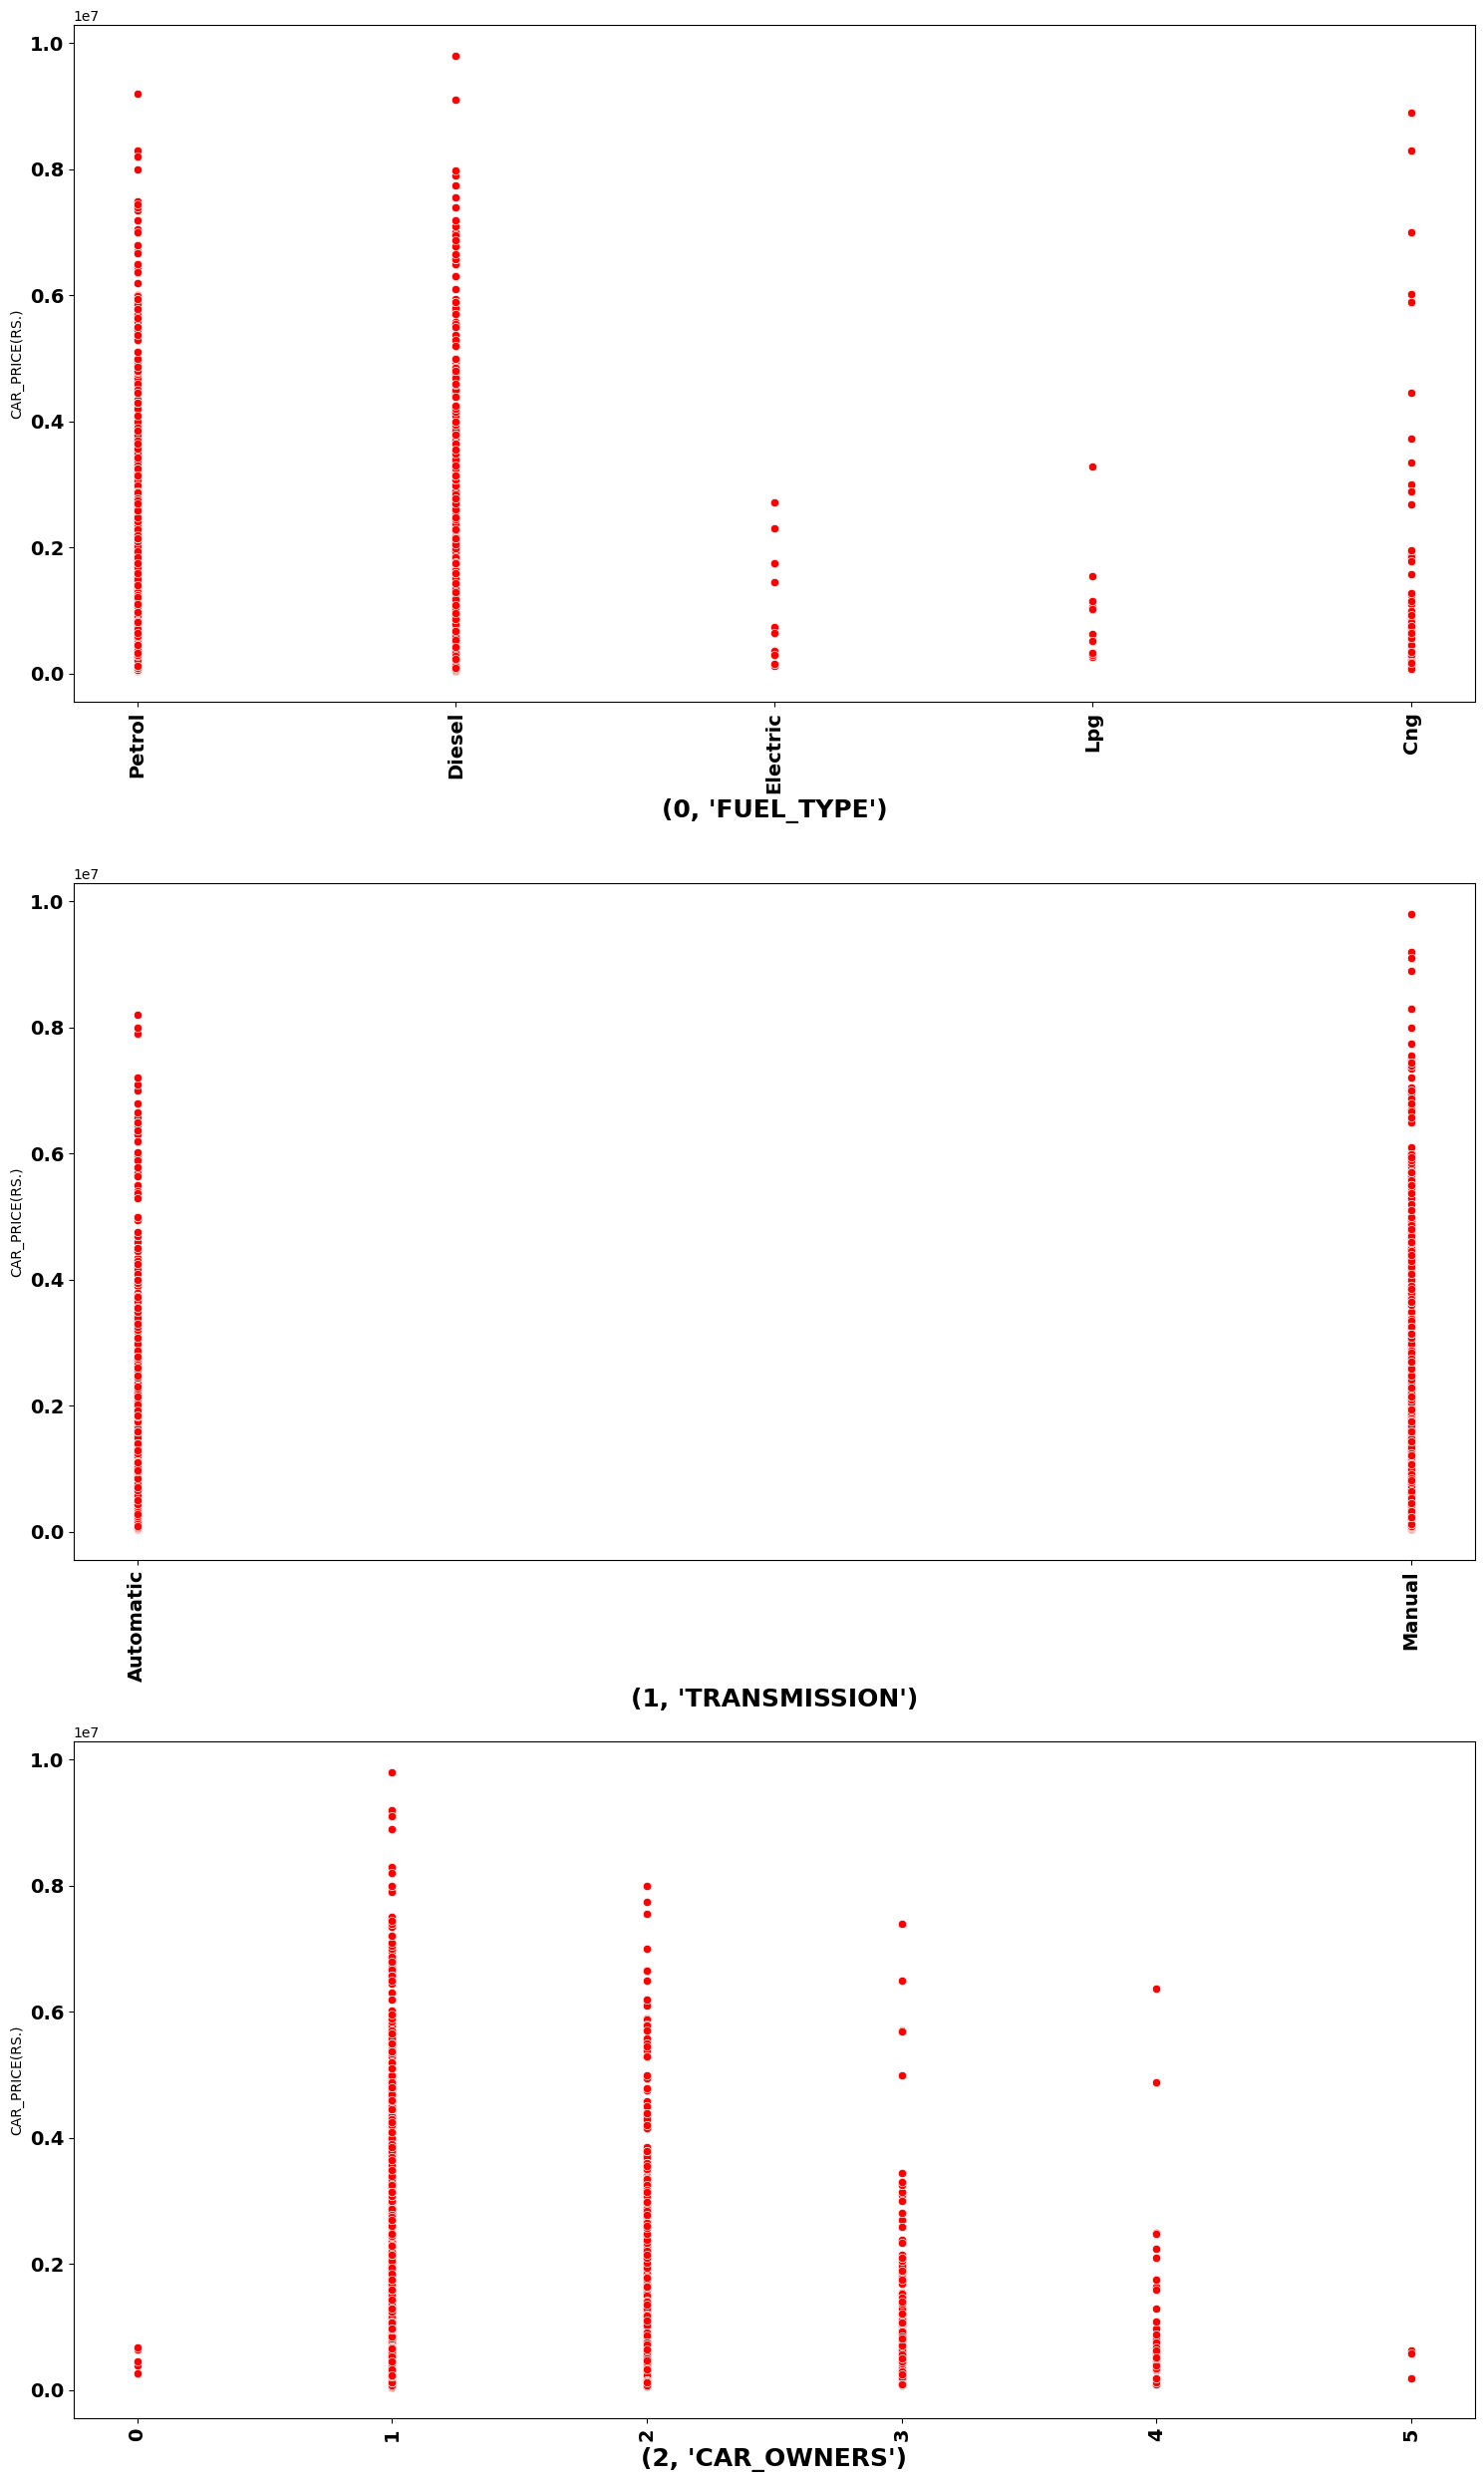

In [53]:
newcollist=['FUEL_TYPE','TRANSMISSION','CAR_OWNERS']
plt.figure(figsize=(15,25))
for i in enumerate(newcollist):
    plt.subplot(3,1,i[0]+1)
    plt.xlabel(i, fontsize=18,fontweight ='bold')
    sns.scatterplot(data=df,x=i[1], y='CAR_PRICE(RS.)', color='red')
    plt.xticks(fontsize= 14, fontweight='bold', rotation=90)
    plt.yticks(fontsize=14, fontweight ='bold')
    plt.tight_layout()

Just like bar graph, we can see that Price range is likely to be high for cars using Diesel as fuel, or having Manual Transmission or is owned by only 1 Owner.

# Descriptive Statistics

**Describing DataSets**

In [55]:
round(df.describe()[1:].transpose(), 2)

,mean,std,min,25%,50%,75%,max
CAR_AGE,2.016050e+03,3.480000e+00,2003.0,2014.0,2017.00,2019.00,2.022000e+03
CAR_KMS,5.750999e+04,5.111901e+04,252.0,30000.0,52000.50,77644.00,2.495000e+06
CAR_OWNERS,1.340000e+00,6.100000e-01,0.0,1.0,1.00,2.00,5.000000e+00
SEATING_CAPACITY,5.190000e+00,6.400000e-01,2.0,5.0,5.00,5.00,9.000000e+00
ENGINE_DISPLACEMENT(CC),1.506540e+03,5.139900e+02,0.0,1197.0,1396.00,1599.00,5.461000e+03
MILEAGE(kmpl),1.873000e+01,4.220000e+00,6.9,16.3,18.53,21.01,1.200000e+02
CAR_MAX_PWR,1.277905e+09,6.452428e+10,1.0,188.0,1032.00,8180.00,3.258636e+12
TORQUE(NM),1.823300e+02,1.251500e+02,3.0,110.0,145.00,250.00,8.500000e+02
WHEEL_SIZE,1.539000e+01,1.210000e+00,12.0,15.0,15.00,16.00,2.100000e+01
CAR_PRICE(RS.),1.004696e+06,1.150875e+06,40000.0,375000.0,630000.00,1076250.00,9.800000e+06


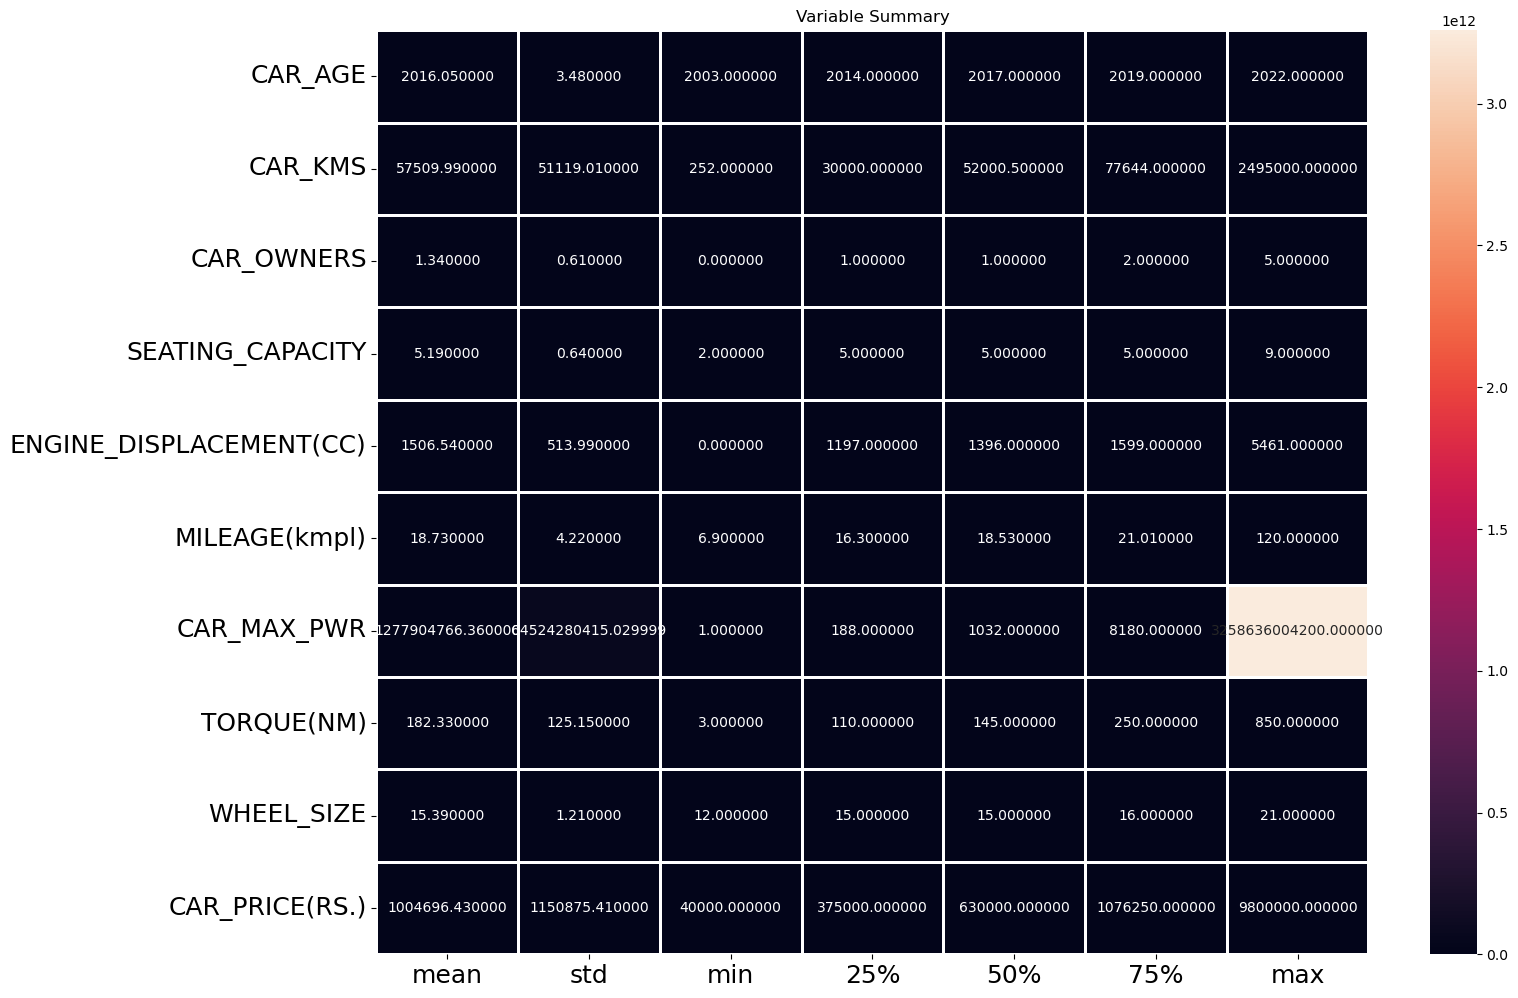

In [56]:
plt.figure(figsize=(16,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidths=2,annot=True,fmt='f',color='red')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

It gives us the statistical summary(which includes mean, median, standard deviation, minimum value, maximum value and quartile values) of all the numerical columns.

In [57]:
df.dtypes

CAR_MODEL                   object
CAR_AGE                      int64
CAR_KMS                      int64
TRANSMISSION                object
FUEL_TYPE                   object
CAR_OWNERS                   int64
SEATING_CAPACITY             int64
ENGINE_DISPLACEMENT(CC)    float64
MILEAGE(kmpl)              float64
CAR_MAX_PWR                float64
TORQUE(NM)                 float64
WHEEL_SIZE                   int64
CAR_PRICE(RS.)             float64
dtype: object

In [58]:
Categorical_Data=['CAR_MODEL', 'TRANSMISSION', 'FUEL_TYPE']

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_Data:
    df[i] = le.fit_transform(df[i])
df.head()

,CAR_MODEL,CAR_AGE,CAR_KMS,TRANSMISSION,FUEL_TYPE,CAR_OWNERS,SEATING_CAPACITY,ENGINE_DISPLACEMENT(CC),MILEAGE(kmpl),CAR_MAX_PWR,TORQUE(NM),WHEEL_SIZE,CAR_PRICE(RS.)
0,591,2019,32000,0,4,1,5,998.0,18.15,11835.0,171.6,16,1095000.0
1,748,2017,139000,0,1,1,7,2999.0,13.80,17457.0,380.0,18,1750000.0
2,289,2015,59534,1,4,2,5,1198.0,18.00,867.0,109.0,15,440000.0
3,480,2013,13000,1,4,1,5,814.0,21.10,552.0,74.5,15,310000.0
4,1261,2020,50000,1,4,1,5,1197.0,21.21,8180.0,113.0,15,700000.0


Transforming the data from object to ordinal type.

In [60]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(df):
    vif=pd.DataFrame()
    vif['variables']=df.columns
    vif["vif_factor"]=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

In [61]:
cal_vif(df)

,variables,vif_factor
0,CAR_MODEL,1.000899
1,CAR_AGE,0.000805
2,CAR_KMS,1.003912
3,TRANSMISSION,1.002788
4,FUEL_TYPE,1.004231
5,CAR_OWNERS,1.001452
6,SEATING_CAPACITY,1.000412
7,ENGINE_DISPLACEMENT(CC),1.004482
8,MILEAGE(kmpl),1.001532
9,CAR_MAX_PWR,1.002277


Cheking outliers

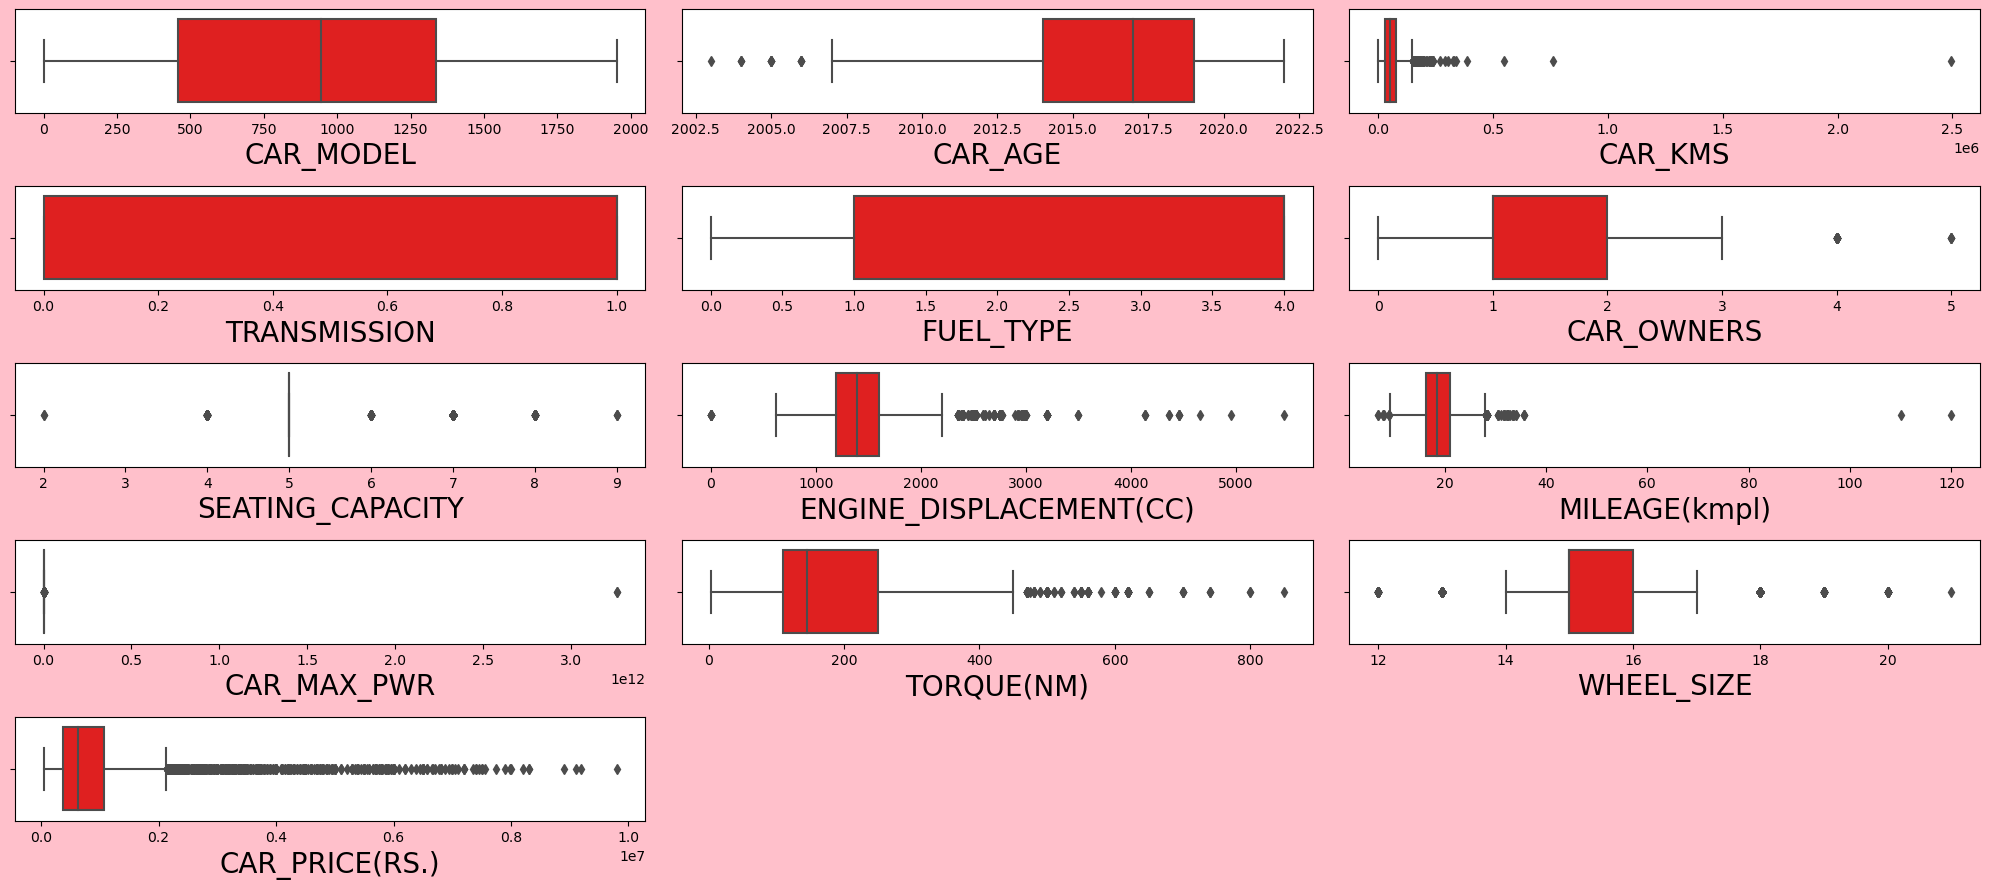

In [62]:
plt.figure(figsize=(20,9),facecolor='pink')
pl_no=1
for i in df:
    if pl_no<=13:
        ax=plt.subplot(5, 3, pl_no)
        sns.boxplot(df[i],color='red')
        plt.xlabel(i,fontsize=20)
    pl_no+=1
plt.tight_layout()

# Removing Outliers

In [ ]:
zscore(df)

In [ ]:
z=np.abs(zscore(df))

In [ ]:
z

In [ ]:
z.shape

In [ ]:
type(z)

In [ ]:
# Index Number
np.where(z>3)

In [ ]:
z.iloc[10]

In [ ]:
len(np.where(z>3)[0])

In [ ]:
df=df[(z<3).all(axis=1)]

In [ ]:
df.shape

In [ ]:
df_new.shape

In [ ]:
print("Total Droped Rows", df.shape[0]-df_new.shape[0])

**Percentage Data Loss**

In [ ]:
loss_percent=(5100-4777)/5100*100
print(loss_percent, '%')

Cheking whether how much outliers are still there.

If the outliers there help in the testing the model or not.

Dividing Data in Features and Vectors:

In [ ]:
df_new

# Model Building

**Seperate The Data**

In [63]:
# Independent Column

x = df.iloc[:,:-1]
x

,CAR_MODEL,CAR_AGE,CAR_KMS,TRANSMISSION,FUEL_TYPE,CAR_OWNERS,SEATING_CAPACITY,ENGINE_DISPLACEMENT(CC),MILEAGE(kmpl),CAR_MAX_PWR,TORQUE(NM),WHEEL_SIZE
0,591,2019,32000,0,4,1,5,998.0,18.15,11835.0,171.6,16
1,748,2017,139000,0,1,1,7,2999.0,13.80,17457.0,380.0,18
2,289,2015,59534,1,4,2,5,1198.0,18.00,867.0,109.0,15
3,480,2013,13000,1,4,1,5,814.0,21.10,552.0,74.5,15
4,1261,2020,50000,1,4,1,5,1197.0,21.21,8180.0,113.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
5095,368,2017,19979,1,1,1,5,1197.0,18.90,12136.0,90.0,15
5096,1029,2015,111000,1,4,1,5,1061.0,14.08,1475.0,138.0,15
5097,1122,2015,55000,1,4,1,5,1197.0,12.00,1944.0,17.0,15
5098,656,2020,41900,0,4,1,5,1086.0,15.56,838.0,24.0,16


In [64]:
x.shape

(5100, 12)

In [65]:
# Target Column

y=df.iloc[:,-1]
y

0       1095000.0
1       1750000.0
2        440000.0
3        310000.0
4        700000.0
          ...    
5095     430000.0
5096     450000.0
5097     335000.0
5098     975000.0
5099     235000.0
Name: CAR_PRICE(RS.), Length: 5100, dtype: float64

Separating feature and target variables into x and y.

**Transforming The Data To Remove Skewness**

In [66]:
x=power_transform(x,method='yeo-johnson')


In [67]:
type(x)

numpy.ndarray

In [68]:
x

array([[-0.53246612,  0.8487839 , -0.55700524, ...,  1.19278901,
         0.10802805,  0.56665178],
       [-0.2264483 ,  0.23921792,  1.7476016 , ...,  1.37949566,
         1.43516271,  1.97887102],
       [-1.21346794, -0.34323086,  0.27097191, ..., -0.13928849,
        -0.4572497 , -0.26626048],
       ...,
       [ 0.42804554, -0.34323086,  0.15471939, ...,  0.28678042,
        -1.8445205 , -0.26626048],
       [-0.40287833,  1.16411928, -0.22015186, ..., -0.15753184,
        -1.67036449,  0.56665178],
       [ 0.55641329, -0.62465743, -0.09563616, ..., -1.18378213,
        -0.66230746,  1.31045178]])

In [69]:
x.ndim

2

In [70]:
x.mean()

2.370797820951184e-15

In [71]:
x.std()

1.0

**STANDARD SCALING IN DATASET**

In [72]:
scale = StandardScaler()
x=scale.fit_transform(x)

In [73]:
x.mean()

-2.3220350841833338e-18

In [74]:
x.std()

1.0

Power transforming and scaling the feature variables.

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.2)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (4080, 12)
Training target vector size: (4080,)
Test feature matrix size: (1020, 12)
Test target vector size: (1020,)


In [123]:
#from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=.005)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.06702926608352577  on Random_state  59


In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state = 59)
svr = SVR()
svr.fit(x_train,y_train)
pred_train_svr=svr.predict(x_train)
pred_test_svr=svr.predict(x_test)
print('SVR Regressor Score:',svr.score(x_train,y_train))
print('SVR Regressor r2_score:',r2_score(y_test,pred_test_svr))
print("Mean squared error of SVR Regressor:",mean_squared_error(y_test,pred_test_svr))
print("Root Mean Square error of SVR Regressor:",np.sqrt(mean_squared_error(y_test,pred_test_svr)))

SVR Regressor Score: -0.10679171556413247
SVR Regressor r2_score: -0.11004744621898555
Mean squared error of SVR Regressor: 1520874043319.233
Root Mean Square error of SVR Regressor: 1233237.221024095


The Accuracy of SVR is in negative which stats that this is not the correct model to apply here.

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state = 59)
lr= LinearRegression()
lr.fit(x_train,y_train)
lr.coef_
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('Linear Regression Score:',lr.score(x_train,y_train))
print('Linear Regression r2_score:',r2_score(y_test,pred_test))
print("Mean squared error of Linear Regression:",mean_squared_error(y_test,pred_test))
print("Root Mean Square error of Linear Regression:",np.sqrt(mean_squared_error(y_test,pred_test)))

Linear Regression Score: 0.0036438551695818777
Linear Regression r2_score: 0.0008556934312901054
Mean squared error of Linear Regression: 1368925847779.276
Root Mean Square error of Linear Regression: 1170011.0460073769


The accuracy of Linear Regression is only 0.00085

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state = 59)

sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred_train_sgd=sgd.predict(x_train)
pred_test_sgd=sgd.predict(x_test)
print('SGD Regressor Score:',sgd.score(x_train,y_train))
print('SGD Regressor r2_score:',r2_score(y_test,pred_test_sgd))
print("Mean squared error of SGD Regressor:",mean_squared_error(y_test,pred_test_sgd))
print("Root Mean Square error of SGD Regressor:",np.sqrt(mean_squared_error(y_test,pred_test_sgd)))

SGD Regressor Score: 0.0027250931072292373
SGD Regressor r2_score: -0.0016070236498451074
Mean squared error of SGD Regressor: 1372300012097.6526
Root Mean Square error of SGD Regressor: 1171452.0955197667


The accuracy of Linear Regression is only 77%

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state = 59)

knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_train_knr=knr.predict(x_train)
pred_test_knr=knr.predict(x_test)
print('K Neighbors Regressor Score:',knr.score(x_train,y_train))
print('K Neighbors Regressor r2_score:',r2_score(y_test,pred_test_knr))
print("Mean squared error of K Neighbors Regressor:",mean_squared_error(y_test,pred_test_knr))
print("Root Mean Square error of K Neighbors Regressor:",np.sqrt(mean_squared_error(y_test,pred_test_knr)))

K Neighbors Regressor Score: 0.2149014711657744
K Neighbors Regressor r2_score: -0.16667897433419654
Mean squared error of K Neighbors Regressor: 1598464799856.0813
Root Mean Square error of K Neighbors Regressor: 1264304.0772915673


In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state = 59)

dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(x_train,y_train)
pred_train_dtr=dtr.predict(x_train)
pred_test_dtr=dtr.predict(x_test)
print('Decision Tree Regressor Score:',dtr.score(x_train,y_train))
print('Decision Tree Regressor r2_score:',r2_score(y_test,pred_test_dtr))
print("Mean squared error of Decision Tree Regressor:",mean_squared_error(y_test,pred_test_dtr))
print("Root Mean Square error of Decision Tree Regressor:",np.sqrt(mean_squared_error(y_test,pred_test_dtr)))

Decision Tree Regressor Score: 1.0
Decision Tree Regressor r2_score: -1.1688810476838563
Mean squared error of Decision Tree Regressor: 2971580088495.3047
Root Mean Square error of Decision Tree Regressor: 1723827.1631736474


In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state = 59)

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_train_rf=rf.predict(x_train)
pred_test_rf=rf.predict(x_test)
print('Random Forest Regressor Score:',rf.score(x_train,y_train))
print('Random Forest Regressor r2_score:',r2_score(y_test,pred_test_rf))
print("Mean squared error of Random Forest Regressor:",mean_squared_error(y_test,pred_test_rf))
print("Root Mean Square error of Random Forest Regressor:",np.sqrt(mean_squared_error(y_test,pred_test_rf)))

Random Forest Regressor Score: 0.8510524207319321
Random Forest Regressor r2_score: -0.04379287749472982
Mean squared error of Random Forest Regressor: 1430098775859.0417
Root Mean Square error of Random Forest Regressor: 1195867.3738584232
